## Attribute Information
##### 1. Structural connectivity matrices
##### 2. Age: age of the subject (Label)
##### 3. Sex:  sex of the subject (0 → male; 1 → female)
##### 4. Education: years of education (continuous)

### Read MATLAB data file

In [1]:
import numpy as np
import scipy.io
import shap
import seaborn as sns
import math
train_mat = scipy.io.loadmat('train_data.mat') 
test_mat = scipy.io.loadmat('test_data.mat') 

In [2]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print(train_np.shape)
    print(test_np.shape)
    return  train_np, test_np


train_data, test_data = get_data_from_mat('train_data.mat','test_data.mat')

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
(112, 90, 90)
(28, 90, 90)


In [3]:
print(train_data[0])

[[0.         0.         0.13152513 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.13152513 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.28060623]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.28060623 0.         0.        ]]


In [4]:
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact

def visualize(image):  
    #plt.figure("sample", (12, 6))
    #plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")    
    #plt.subplot(1, 2, 2)
    #plt.imshow(image, cmap="gray")
    plt.show()      


#@interact
def show_ds(ds):
    print("ds shape:",ds.shape)
    print("ds max:",np.max(ds))
    print("ds min:",np.min(ds))
    print("ds average:",np.average(ds))
    @interact
    def visualize_set(scan_index=(0,len(ds)-1)):
        #print(scan_index)
        visualize(ds[scan_index,:,:])

show_ds(train_data)

ds shape: (112, 90, 90)
ds max: 1.0
ds min: 0.0
ds average: 0.024116160549305543


interactive(children=(IntSlider(value=55, description='scan_index', max=111), Output()), _dom_classes=('widget…

In [5]:
show_ds(test_data)

ds shape: (28, 90, 90)
ds max: 1.0
ds min: 0.0
ds average: 0.024994026906171023


interactive(children=(IntSlider(value=13, description='scan_index', max=27), Output()), _dom_classes=('widget-…

In [6]:
import pandas as pd
import numpy as np
import scipy.io
mat = scipy.io.loadmat('train_data.mat')
pqr=pd.Series(mat)
pd.DataFrame({'label':pqr.index, 'list':pqr.values})

,label,list
0,__header__,"b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Crea..."
1,__version__,1.0
2,__globals__,[]
3,train_data,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."


In [7]:
print(pqr)

__header__     b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Crea...
__version__                                                  1.0
__globals__                                                   []
train_data     [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
dtype: object


### Read and prepare remaining features

In [8]:
data = np.genfromtxt("train.csv", delimiter=",")
data = data[1:]
X = np.delete(data, 1, 1)
X = np.delete(X, 0, 1)

Y = np.delete(data, 0, 1)
Y = np.delete(Y, 2, 1)
Y = np.delete(Y, 1, 1)

data = np.genfromtxt("test.csv", delimiter=",")
data = data[1:]
Xtest = np.delete(data, 0, 1)

In [9]:
print(f"Shape X: {X.shape}")
print(f"Shape Y: {Y.shape}")

Shape X: (112, 2)
Shape Y: (112, 1)


In [10]:
Y

array([[13.],
       [14.],
       [15.],
       [15.],
       [15.],
       [15.],
       [16.],
       [16.],
       [16.],
       [17.],
       [15.],
       [16.],
       [16.],
       [15.],
       [16.],
       [15.],
       [17.],
       [16.],
       [16.],
       [24.],
       [37.],
       [21.],
       [24.],
       [18.],
       [26.],
       [18.],
       [40.],
       [25.],
       [54.],
       [33.],
       [46.],
       [25.],
       [19.],
       [18.],
       [31.],
       [18.],
       [24.],
       [28.],
       [24.],
       [27.],
       [27.],
       [19.],
       [19.],
       [40.],
       [41.],
       [27.],
       [24.],
       [20.],
       [42.],
       [22.],
       [20.],
       [25.],
       [22.],
       [25.],
       [18.],
       [61.],
       [53.],
       [65.],
       [53.],
       [77.],
       [64.],
       [56.],
       [55.],
       [62.],
       [68.],
       [62.],
       [57.],
       [68.],
       [58.],
       [70.],
       [69.],
      

In [11]:
shuffler = np.random.permutation(len(Y))
Y = Y[shuffler]
train_data = train_data[shuffler]
X = X[shuffler]

In [12]:
Y

array([[42.],
       [24.],
       [69.],
       [27.],
       [41.],
       [58.],
       [64.],
       [51.],
       [59.],
       [28.],
       [77.],
       [58.],
       [53.],
       [40.],
       [37.],
       [24.],
       [61.],
       [15.],
       [68.],
       [69.],
       [59.],
       [19.],
       [52.],
       [57.],
       [40.],
       [64.],
       [31.],
       [22.],
       [33.],
       [16.],
       [15.],
       [18.],
       [14.],
       [24.],
       [18.],
       [71.],
       [55.],
       [15.],
       [16.],
       [18.],
       [46.],
       [56.],
       [65.],
       [58.],
       [76.],
       [70.],
       [62.],
       [20.],
       [16.],
       [13.],
       [20.],
       [24.],
       [76.],
       [71.],
       [63.],
       [71.],
       [67.],
       [51.],
       [73.],
       [25.],
       [15.],
       [72.],
       [69.],
       [19.],
       [68.],
       [63.],
       [68.],
       [24.],
       [15.],
       [55.],
       [16.],
      

### Data Exploration

####  Age

Text(0.5, 1.0, 'Age of subjects')

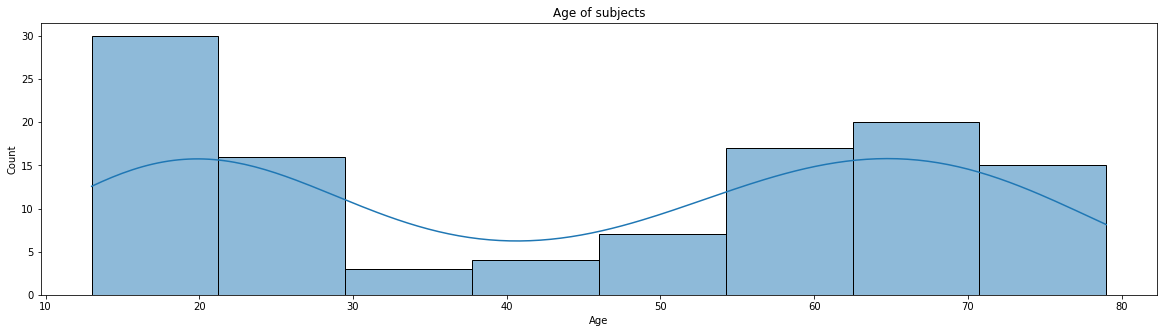

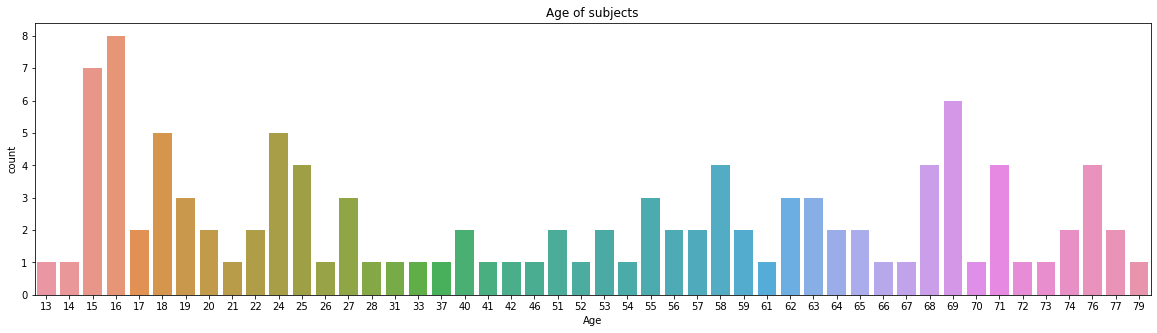

In [13]:
plt.figure(figsize=(20,5))

sns.histplot(x=Y.flatten().astype(int), kde=True)
plt.xlabel('Age')
plt.title('Age of subjects') 

plt.figure(figsize=(20,5))
sns.countplot(x=Y.flatten().astype(int))
plt.xlabel('Age')
plt.title('Age of subjects')

In [14]:
from scipy.stats import skew, kurtosis
print("Skewness: %f" % skew(Y.flatten()))
print("Kurtosis: %f" % kurtosis(Y.flatten()))
print("Age: %f" % np.mean(Y.flatten()) + " ± %f" % np.std(Y.flatten()))

Skewness: -0.048943
Kurtosis: -1.648681
Age: 44.312500 ± 22.540848


####  Sex

Text(0, 0.5, 'Idade')

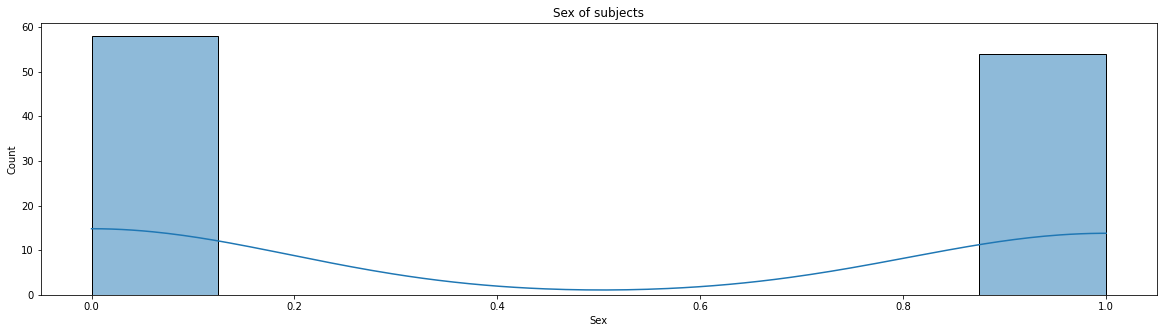

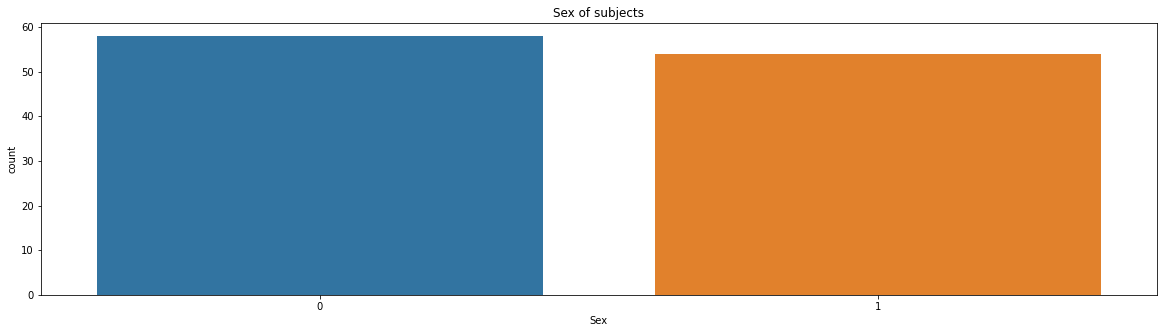

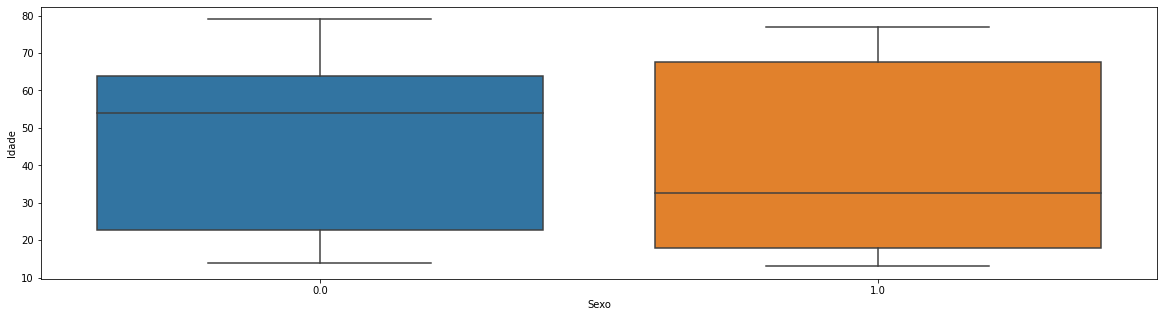

In [15]:
plt.figure(figsize=(20,5))
sns.histplot(x=X[:,0].flatten().astype(int), kde=True)
plt.xlabel('Sex')
plt.title('Sex of subjects') 

plt.figure(figsize=(20,5))
sns.countplot(x=X[:,0].flatten().astype(int))
plt.xlabel('Sex')
plt.title('Sex of subjects') 

plt.figure(figsize=(20,5))
ax = sns.boxplot(x=X[:,0].flatten(), y=Y.flatten())
ax.set_xlabel("Sexo", fontsize = 10)
ax.set_ylabel("Idade", fontsize = 10)

In [16]:
print("Skewness: %f" % skew(X[:,0].flatten()))
print("Kurtosis: %f" % kurtosis(X[:,0].flatten()))
print("Age: %f" % np.mean(X[:,0].flatten()) + " ± %f" % np.std(X[:,0].flatten()))

Skewness: 0.071474
Kurtosis: -1.994891
Age: 0.482143 ± 0.499681


####  Education

Text(0, 0.5, 'Idade')

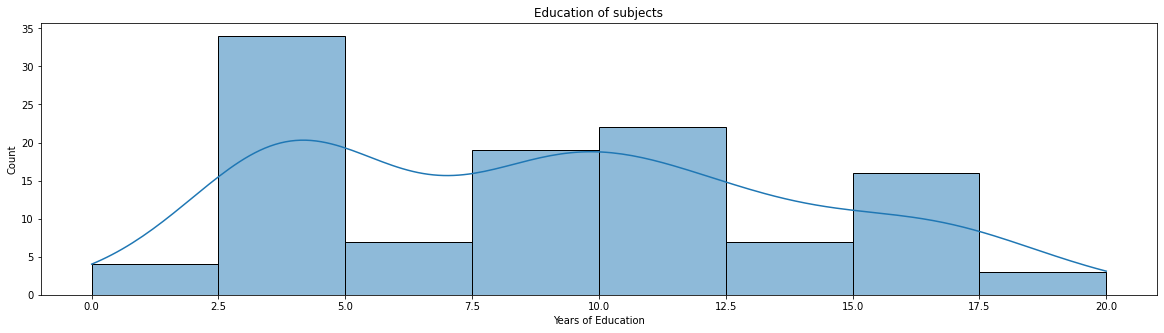

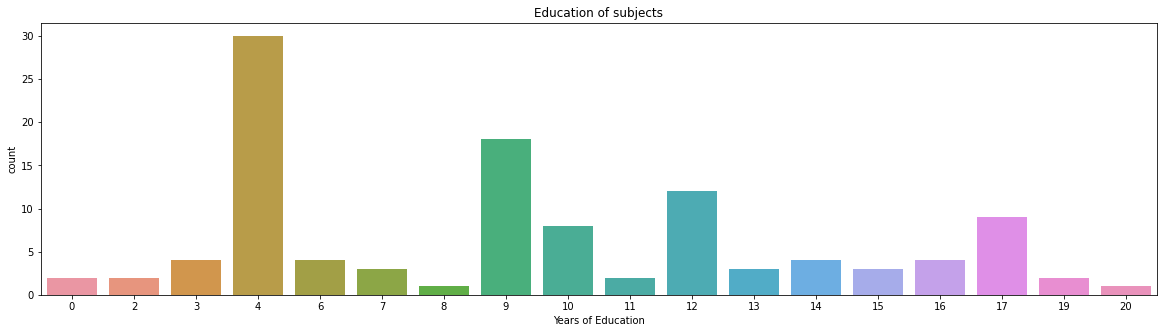

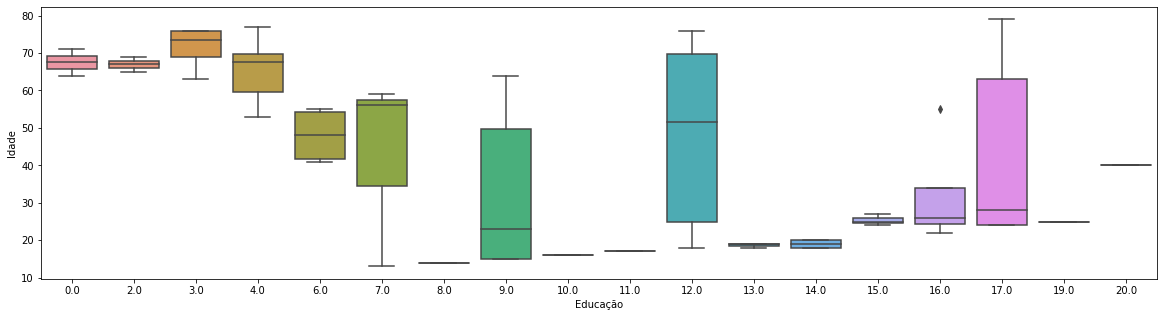

In [17]:
plt.figure(figsize=(20,5))
sns.histplot(x=X[:,1].flatten().astype(int), kde=True)
plt.xlabel('Years of Education')
plt.title('Education of subjects') 

plt.figure(figsize=(20,5))
sns.countplot(x=X[:,1].flatten().astype(int))
plt.xlabel('Years of Education')
plt.title('Education of subjects') 

plt.figure(figsize=(20,5))
ax = sns.boxplot(x=X[:,1].flatten(), y=Y.flatten())
ax.set_xlabel("Educação", fontsize = 10)
ax.set_ylabel("Idade", fontsize = 10)

In [18]:
print("Skewness: %f" % skew(X[:,1].flatten()))
print("Kurtosis: %f" % kurtosis(X[:,1].flatten()))
print("Age: %f" % np.mean(X[:,1].flatten()) + " ± %f" % np.std(X[:,1].flatten()))

Skewness: 0.292163
Kurtosis: -0.951812
Age: 9.035714 ± 4.887902


### Models

In [19]:
import random
import os

os.environ['PYTHONHASHSEED']=str(2)

import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.models import Model

In [20]:
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(2)
   tf.random.set_seed(2)
   np.random.seed(2)
   random.seed(2)

reset_random_seeds()

In [21]:
train_data.shape

(112, 90, 90)

In [22]:
train_data = train_data.reshape(train_data.shape[0],90,90,1)

In [23]:
train_data.shape

(112, 90, 90, 1)

In [24]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<110):
            print("\nReached 110 val_loss so cancelling training!")
            self.model.stop_training = True
callback = myCallback()

#### Model without sex and education

In [25]:

def build_model(num_classes, activation='relu', loss='mean_squared_error'):
    reset_random_seeds()
    model = tf.keras.Sequential()
    model.add(L.Conv2D(32,(3,3),input_shape=(90,90,1),padding='same',activation='relu'))
    model.add(L.MaxPool2D(2,2))
    model.add(L.BatchNormalization())

    model.add(L.Conv2D(64,(3,3),activation='relu'))
    model.add(L.MaxPool2D(2,2))

    model.add(L.Conv2D(128,(3,3),activation='relu'))
    model.add(L.MaxPool2D(2,2))

    model.add(L.Flatten())

    model.add(L.Dense(64, activation='relu')),
    model.add(L.Dropout(0.2)),
    model.add(L.Dense(num_classes,activation="relu"))
   
    sgd = tf.keras.optimizers.SGD(momentum=0.9)
    
    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['mae']
    )
    
    return model

------------------------------------------------------------------------
Training for fold 1 ...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 90, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 45, 45, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________

Epoch 106/500
2/2 [==============================] - 0s 15ms/step - loss: 59.3325 - mae: 6.2828 - val_loss: 2795.2451 - val_mae: 50.2521
Epoch 107/500
2/2 [==============================] - 0s 14ms/step - loss: 63.0572 - mae: 6.3333 - val_loss: 2739.9045 - val_mae: 49.7189
Epoch 108/500
2/2 [==============================] - 0s 14ms/step - loss: 77.5825 - mae: 6.9227 - val_loss: 2685.4446 - val_mae: 49.1886
Epoch 109/500
2/2 [==============================] - 0s 15ms/step - loss: 69.0871 - mae: 6.7424 - val_loss: 2786.5510 - val_mae: 50.1867
Epoch 110/500
2/2 [==============================] - 0s 14ms/step - loss: 61.7270 - mae: 6.1626 - val_loss: 2700.5596 - val_mae: 49.3405
Epoch 111/500
2/2 [==============================] - 0s 15ms/step - loss: 65.2132 - mae: 6.6627 - val_loss: 2665.4580 - val_mae: 48.9913
Epoch 112/500
2/2 [==============================] - 0s 15ms/step - loss: 56.9013 - mae: 6.0382 - val_loss: 2753.3389 - val_mae: 49.8693
Epoch 113/500
2/2 [======================

Epoch 166/500
2/2 [==============================] - 0s 15ms/step - loss: 40.7944 - mae: 4.7310 - val_loss: 2308.3010 - val_mae: 45.6107
Epoch 167/500
2/2 [==============================] - 0s 15ms/step - loss: 31.3736 - mae: 4.5108 - val_loss: 2329.9958 - val_mae: 45.8454
Epoch 168/500
2/2 [==============================] - 0s 16ms/step - loss: 42.8389 - mae: 4.8166 - val_loss: 2254.1516 - val_mae: 45.0313
Epoch 169/500
2/2 [==============================] - 0s 15ms/step - loss: 41.0721 - mae: 4.9425 - val_loss: 2137.4939 - val_mae: 43.7477
Epoch 170/500
2/2 [==============================] - 0s 15ms/step - loss: 59.7550 - mae: 6.1612 - val_loss: 2344.7952 - val_mae: 46.0063
Epoch 171/500
2/2 [==============================] - 0s 15ms/step - loss: 50.4000 - mae: 5.6270 - val_loss: 2300.6003 - val_mae: 45.5251
Epoch 172/500
2/2 [==============================] - 0s 14ms/step - loss: 39.1764 - mae: 4.8377 - val_loss: 2149.4602 - val_mae: 43.8552
Epoch 173/500
2/2 [======================

Epoch 285/500
2/2 [==============================] - 0s 14ms/step - loss: 29.1001 - mae: 4.0959 - val_loss: 895.5773 - val_mae: 27.6069
Epoch 286/500
2/2 [==============================] - 0s 15ms/step - loss: 30.3220 - mae: 3.9468 - val_loss: 1004.8480 - val_mae: 29.5262
Epoch 287/500
2/2 [==============================] - 0s 14ms/step - loss: 31.9520 - mae: 4.4446 - val_loss: 854.2333 - val_mae: 26.8734
Epoch 288/500
2/2 [==============================] - 0s 14ms/step - loss: 27.7236 - mae: 3.9068 - val_loss: 814.8205 - val_mae: 26.1287
Epoch 289/500
2/2 [==============================] - 0s 15ms/step - loss: 30.5939 - mae: 4.2003 - val_loss: 931.8818 - val_mae: 28.2523
Epoch 290/500
2/2 [==============================] - 0s 15ms/step - loss: 32.7712 - mae: 4.4058 - val_loss: 902.1662 - val_mae: 27.6894
Epoch 291/500
2/2 [==============================] - 0s 15ms/step - loss: 27.2712 - mae: 3.8303 - val_loss: 733.5601 - val_mae: 24.5270
Epoch 292/500
2/2 [============================

Epoch 345/500
2/2 [==============================] - 0s 15ms/step - loss: 21.9825 - mae: 3.5889 - val_loss: 381.3161 - val_mae: 16.8308
Epoch 346/500
2/2 [==============================] - 0s 15ms/step - loss: 37.6679 - mae: 4.4003 - val_loss: 530.8738 - val_mae: 20.3478
Epoch 347/500
2/2 [==============================] - 0s 15ms/step - loss: 36.4112 - mae: 4.5171 - val_loss: 464.4041 - val_mae: 18.8129
Epoch 348/500
2/2 [==============================] - 0s 15ms/step - loss: 31.9748 - mae: 4.4210 - val_loss: 386.7140 - val_mae: 16.8589
Epoch 349/500
2/2 [==============================] - 0s 15ms/step - loss: 36.4170 - mae: 4.6857 - val_loss: 552.3947 - val_mae: 20.7430
Epoch 350/500
2/2 [==============================] - 0s 15ms/step - loss: 38.4333 - mae: 4.6710 - val_loss: 445.0073 - val_mae: 18.3321
Epoch 351/500
2/2 [==============================] - 0s 14ms/step - loss: 28.0005 - mae: 3.8670 - val_loss: 375.6169 - val_mae: 16.5167
Epoch 352/500
2/2 [=============================

Epoch 405/500
2/2 [==============================] - 0s 14ms/step - loss: 25.2205 - mae: 4.1223 - val_loss: 252.6707 - val_mae: 12.9828
Epoch 406/500
2/2 [==============================] - 0s 15ms/step - loss: 27.0330 - mae: 3.8299 - val_loss: 265.0239 - val_mae: 13.4391
Epoch 407/500
2/2 [==============================] - 0s 15ms/step - loss: 16.1215 - mae: 2.9716 - val_loss: 273.3162 - val_mae: 13.7572
Epoch 408/500
2/2 [==============================] - 0s 16ms/step - loss: 29.8898 - mae: 4.0132 - val_loss: 252.6106 - val_mae: 13.1947
Epoch 409/500
2/2 [==============================] - 0s 15ms/step - loss: 36.6812 - mae: 4.5031 - val_loss: 201.4462 - val_mae: 11.4456
Epoch 410/500
2/2 [==============================] - 0s 14ms/step - loss: 27.9887 - mae: 4.3688 - val_loss: 253.4547 - val_mae: 13.1167
Epoch 411/500
2/2 [==============================] - 0s 15ms/step - loss: 28.3354 - mae: 3.7625 - val_loss: 263.9292 - val_mae: 13.3178
Epoch 412/500
2/2 [=============================

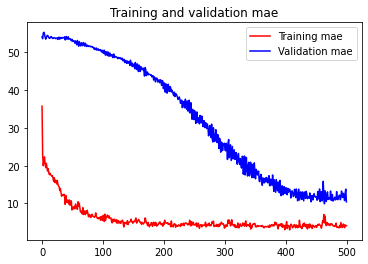

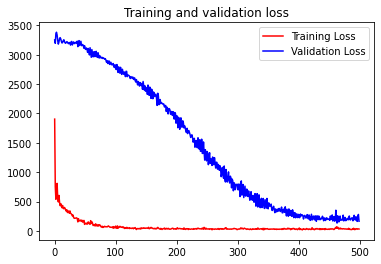

Score for fold 1: ['loss', 'mae'] of [163.9345245361328, 10.403288841247559]
------------------------------------------------------------------------
Training for fold 2 ...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 90, 90, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 45, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 43, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_5 (Co

Epoch 104/500
2/2 [==============================] - 0s 20ms/step - loss: 51.7922 - mae: 5.6082 - val_loss: 2087.8289 - val_mae: 41.6758
Epoch 105/500
2/2 [==============================] - 0s 19ms/step - loss: 66.5450 - mae: 6.5163 - val_loss: 2129.9717 - val_mae: 42.1776
Epoch 106/500
2/2 [==============================] - 0s 15ms/step - loss: 56.4271 - mae: 5.8873 - val_loss: 2177.0403 - val_mae: 42.7336
Epoch 107/500
2/2 [==============================] - 0s 14ms/step - loss: 62.7489 - mae: 6.1683 - val_loss: 2066.8054 - val_mae: 41.4760
Epoch 108/500
2/2 [==============================] - 0s 15ms/step - loss: 66.8042 - mae: 6.6761 - val_loss: 2108.5181 - val_mae: 41.9794
Epoch 109/500
2/2 [==============================] - 0s 16ms/step - loss: 50.5756 - mae: 5.6880 - val_loss: 2150.8892 - val_mae: 42.4770
Epoch 110/500
2/2 [==============================] - 0s 18ms/step - loss: 54.4463 - mae: 5.8187 - val_loss: 2062.1370 - val_mae: 41.4595
Epoch 111/500
2/2 [======================

2/2 [==============================] - 0s 14ms/step - loss: 28.0967 - mae: 3.9720 - val_loss: 1238.0333 - val_mae: 31.8815
Epoch 223/500
2/2 [==============================] - 0s 15ms/step - loss: 31.1228 - mae: 4.5670 - val_loss: 1130.1051 - val_mae: 30.2032
Epoch 224/500
2/2 [==============================] - 0s 14ms/step - loss: 29.7722 - mae: 4.1503 - val_loss: 1072.0420 - val_mae: 29.2633
Epoch 225/500
2/2 [==============================] - 0s 14ms/step - loss: 33.1563 - mae: 4.7018 - val_loss: 1187.4025 - val_mae: 31.1134
Epoch 226/500
2/2 [==============================] - 0s 16ms/step - loss: 39.8637 - mae: 4.4081 - val_loss: 1119.7335 - val_mae: 30.1248
Epoch 227/500
2/2 [==============================] - 0s 16ms/step - loss: 31.1361 - mae: 4.1961 - val_loss: 1069.3181 - val_mae: 29.3671
Epoch 228/500
2/2 [==============================] - 0s 14ms/step - loss: 24.9306 - mae: 3.8204 - val_loss: 1090.0638 - val_mae: 29.7657
Epoch 229/500
2/2 [==============================] - 0s

2/2 [==============================] - 0s 15ms/step - loss: 32.0439 - mae: 4.4753 - val_loss: 218.2296 - val_mae: 10.9203
Epoch 343/500
2/2 [==============================] - 0s 16ms/step - loss: 19.6951 - mae: 3.3809 - val_loss: 240.7694 - val_mae: 11.7350
Epoch 344/500
2/2 [==============================] - 0s 16ms/step - loss: 28.1566 - mae: 3.6945 - val_loss: 245.7602 - val_mae: 11.8838
Epoch 345/500
2/2 [==============================] - 0s 15ms/step - loss: 19.8427 - mae: 3.4226 - val_loss: 182.5694 - val_mae: 10.1448
Epoch 346/500
2/2 [==============================] - 0s 15ms/step - loss: 33.9693 - mae: 4.2348 - val_loss: 200.6425 - val_mae: 10.5378
Epoch 347/500
2/2 [==============================] - 0s 15ms/step - loss: 31.6903 - mae: 4.1071 - val_loss: 206.7065 - val_mae: 10.7560
Epoch 348/500
2/2 [==============================] - 0s 15ms/step - loss: 34.5868 - mae: 4.5331 - val_loss: 200.6864 - val_mae: 10.5819
Epoch 349/500
2/2 [==============================] - 0s 15ms/s

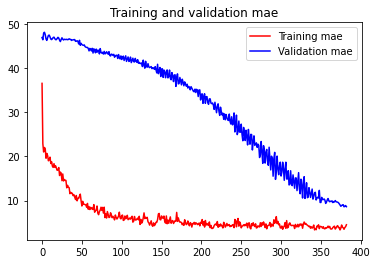

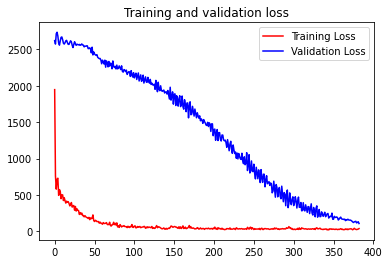

Score for fold 2: ['loss', 'mae'] of [107.72364044189453, 8.624066352844238]
------------------------------------------------------------------------
Training for fold 3 ...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 90, 90, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 45, 45, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 43, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_8 (Co

2/2 [==============================] - 0s 14ms/step - loss: 48.4544 - mae: 5.2996 - val_loss: 1654.3019 - val_mae: 35.7275
Epoch 106/500
2/2 [==============================] - 0s 15ms/step - loss: 42.3450 - mae: 5.4243 - val_loss: 1718.7739 - val_mae: 36.5852
Epoch 107/500
2/2 [==============================] - 0s 15ms/step - loss: 57.9882 - mae: 5.6938 - val_loss: 1630.0675 - val_mae: 35.4471
Epoch 108/500
2/2 [==============================] - 0s 15ms/step - loss: 63.2292 - mae: 6.4662 - val_loss: 1667.9126 - val_mae: 35.9669
Epoch 109/500
2/2 [==============================] - 0s 14ms/step - loss: 40.4115 - mae: 4.9560 - val_loss: 1696.6749 - val_mae: 36.3505
Epoch 110/500
2/2 [==============================] - 0s 14ms/step - loss: 37.1833 - mae: 4.8695 - val_loss: 1637.0922 - val_mae: 35.5765
Epoch 111/500
2/2 [==============================] - 0s 14ms/step - loss: 52.2029 - mae: 5.6676 - val_loss: 1675.7758 - val_mae: 36.0918
Epoch 112/500
2/2 [==============================] - 0s

Epoch 224/500
2/2 [==============================] - 0s 15ms/step - loss: 36.7827 - mae: 4.6724 - val_loss: 860.9540 - val_mae: 25.6678
Epoch 225/500
2/2 [==============================] - 0s 15ms/step - loss: 30.4957 - mae: 4.4792 - val_loss: 961.1957 - val_mae: 27.3653
Epoch 226/500
2/2 [==============================] - 0s 14ms/step - loss: 36.9526 - mae: 4.3462 - val_loss: 904.1360 - val_mae: 26.4317
Epoch 227/500
2/2 [==============================] - 0s 16ms/step - loss: 23.3505 - mae: 3.8246 - val_loss: 858.7525 - val_mae: 25.6926
Epoch 228/500
2/2 [==============================] - 0s 14ms/step - loss: 24.8150 - mae: 3.7449 - val_loss: 891.1307 - val_mae: 26.3144
Epoch 229/500
2/2 [==============================] - 0s 14ms/step - loss: 21.5010 - mae: 3.3818 - val_loss: 923.8090 - val_mae: 26.9132
Epoch 230/500
2/2 [==============================] - 0s 14ms/step - loss: 27.2543 - mae: 4.1199 - val_loss: 871.0234 - val_mae: 26.0182
Epoch 231/500
2/2 [=============================

Epoch 284/500
2/2 [==============================] - 0s 15ms/step - loss: 29.4199 - mae: 4.2170 - val_loss: 415.0806 - val_mae: 17.5370
Epoch 285/500
2/2 [==============================] - 0s 15ms/step - loss: 30.0315 - mae: 4.3663 - val_loss: 378.6305 - val_mae: 16.5260
Epoch 286/500
2/2 [==============================] - 0s 18ms/step - loss: 23.8120 - mae: 3.7849 - val_loss: 476.2793 - val_mae: 19.0825
Epoch 287/500
2/2 [==============================] - 0s 16ms/step - loss: 39.9703 - mae: 4.6616 - val_loss: 379.6653 - val_mae: 16.6619
Epoch 288/500
2/2 [==============================] - 0s 15ms/step - loss: 17.7361 - mae: 3.1910 - val_loss: 379.0537 - val_mae: 16.7058
Epoch 289/500
2/2 [==============================] - 0s 15ms/step - loss: 19.3309 - mae: 3.5023 - val_loss: 444.5762 - val_mae: 18.4630
Epoch 290/500
2/2 [==============================] - 0s 15ms/step - loss: 28.7590 - mae: 4.1015 - val_loss: 398.6559 - val_mae: 17.2278
Epoch 291/500
2/2 [=============================

Epoch 344/500
2/2 [==============================] - 0s 14ms/step - loss: 25.4202 - mae: 3.7345 - val_loss: 188.7524 - val_mae: 11.2546
Epoch 345/500
2/2 [==============================] - 0s 15ms/step - loss: 26.2150 - mae: 3.8639 - val_loss: 125.3767 - val_mae: 8.5139
Epoch 346/500
2/2 [==============================] - 0s 15ms/step - loss: 28.7356 - mae: 4.0352 - val_loss: 142.8140 - val_mae: 9.3189
Epoch 347/500
2/2 [==============================] - 0s 15ms/step - loss: 23.7167 - mae: 3.4497 - val_loss: 165.1506 - val_mae: 10.3188
Epoch 348/500
2/2 [==============================] - 0s 15ms/step - loss: 21.8038 - mae: 3.3108 - val_loss: 136.7915 - val_mae: 9.1749
Epoch 349/500
2/2 [==============================] - 0s 15ms/step - loss: 31.9217 - mae: 4.2469 - val_loss: 149.4870 - val_mae: 9.7746
Epoch 350/500
2/2 [==============================] - 0s 14ms/step - loss: 26.4248 - mae: 3.8780 - val_loss: 132.3829 - val_mae: 9.0531
Epoch 351/500
2/2 [==============================] - 

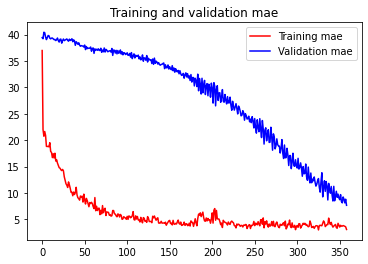

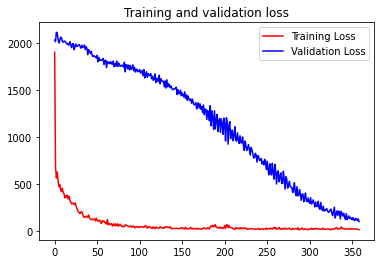

Score for fold 3: ['loss', 'mae'] of [103.8552017211914, 7.658777236938477]
------------------------------------------------------------------------
Training for fold 4 ...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 90, 90, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 45, 45, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_11 (Co

2/2 [==============================] - 0s 15ms/step - loss: 46.4876 - mae: 5.4357 - val_loss: 2586.7070 - val_mae: 47.3854
Epoch 105/500
2/2 [==============================] - 0s 15ms/step - loss: 52.8285 - mae: 5.6900 - val_loss: 2593.8650 - val_mae: 47.4682
Epoch 106/500
2/2 [==============================] - 0s 15ms/step - loss: 51.2577 - mae: 5.8270 - val_loss: 2557.3042 - val_mae: 47.0987
Epoch 107/500
2/2 [==============================] - 0s 14ms/step - loss: 49.7987 - mae: 5.4309 - val_loss: 2574.5674 - val_mae: 47.2836
Epoch 108/500
2/2 [==============================] - 0s 15ms/step - loss: 49.1139 - mae: 5.6744 - val_loss: 2500.1057 - val_mae: 46.5233
Epoch 109/500
2/2 [==============================] - 0s 15ms/step - loss: 45.6565 - mae: 5.4019 - val_loss: 2536.8259 - val_mae: 46.9183
Epoch 110/500
2/2 [==============================] - 0s 15ms/step - loss: 45.4946 - mae: 5.4713 - val_loss: 2571.5771 - val_mae: 47.2894
Epoch 111/500
2/2 [==============================] - 0s

Epoch 164/500
2/2 [==============================] - 0s 15ms/step - loss: 29.4983 - mae: 3.9923 - val_loss: 2091.5806 - val_mae: 42.6016
Epoch 165/500
2/2 [==============================] - 0s 15ms/step - loss: 30.9998 - mae: 4.2435 - val_loss: 2074.2920 - val_mae: 42.4084
Epoch 166/500
2/2 [==============================] - 0s 15ms/step - loss: 25.3270 - mae: 3.8166 - val_loss: 2044.9062 - val_mae: 42.0896
Epoch 167/500
2/2 [==============================] - 0s 15ms/step - loss: 32.8166 - mae: 4.3792 - val_loss: 2079.4514 - val_mae: 42.5099
Epoch 168/500
2/2 [==============================] - 0s 14ms/step - loss: 25.9410 - mae: 3.8786 - val_loss: 1950.1968 - val_mae: 41.0515
Epoch 169/500
2/2 [==============================] - 0s 15ms/step - loss: 29.8940 - mae: 4.1376 - val_loss: 2099.2483 - val_mae: 42.7694
Epoch 170/500
2/2 [==============================] - 0s 15ms/step - loss: 35.0996 - mae: 4.3316 - val_loss: 2008.3640 - val_mae: 41.7480
Epoch 171/500
2/2 [======================

Epoch 224/500
2/2 [==============================] - 0s 15ms/step - loss: 38.2971 - mae: 4.6022 - val_loss: 1380.5797 - val_mae: 34.3299
Epoch 225/500
2/2 [==============================] - ETA: 0s - loss: 25.4585 - mae: 4.42 - 0s 15ms/step - loss: 27.1402 - mae: 4.2518 - val_loss: 1458.4457 - val_mae: 35.3959
Epoch 226/500
2/2 [==============================] - 0s 15ms/step - loss: 27.5297 - mae: 3.9117 - val_loss: 1338.5192 - val_mae: 33.7892
Epoch 227/500
2/2 [==============================] - 0s 15ms/step - loss: 22.6480 - mae: 3.6633 - val_loss: 1323.5001 - val_mae: 33.6271
Epoch 228/500
2/2 [==============================] - 0s 15ms/step - loss: 24.6752 - mae: 3.7415 - val_loss: 1364.9886 - val_mae: 34.2431
Epoch 229/500
2/2 [==============================] - 0s 15ms/step - loss: 22.8531 - mae: 3.3897 - val_loss: 1342.5315 - val_mae: 33.9407
Epoch 230/500
2/2 [==============================] - 0s 14ms/step - loss: 22.9806 - mae: 3.5956 - val_loss: 1321.2511 - val_mae: 33.6324
Epo

Epoch 284/500
2/2 [==============================] - 0s 15ms/step - loss: 23.4720 - mae: 3.5964 - val_loss: 662.6523 - val_mae: 23.2751
Epoch 285/500
2/2 [==============================] - 0s 15ms/step - loss: 28.0309 - mae: 4.0140 - val_loss: 660.1988 - val_mae: 23.2144
Epoch 286/500
2/2 [==============================] - 0s 15ms/step - loss: 19.8756 - mae: 3.4211 - val_loss: 669.7158 - val_mae: 23.4321
Epoch 287/500
2/2 [==============================] - 0s 14ms/step - loss: 30.5084 - mae: 4.1860 - val_loss: 626.7103 - val_mae: 22.5881
Epoch 288/500
2/2 [==============================] - 0s 15ms/step - loss: 19.0600 - mae: 3.3759 - val_loss: 650.1301 - val_mae: 23.0999
Epoch 289/500
2/2 [==============================] - 0s 14ms/step - loss: 20.0101 - mae: 3.4174 - val_loss: 589.6376 - val_mae: 21.8205
Epoch 290/500
2/2 [==============================] - 0s 15ms/step - loss: 27.6362 - mae: 3.9295 - val_loss: 698.4407 - val_mae: 24.0701
Epoch 291/500
2/2 [=============================

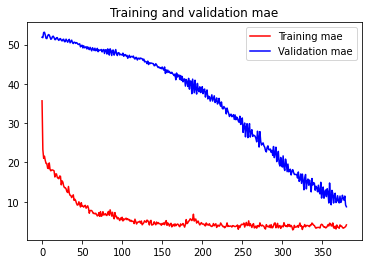

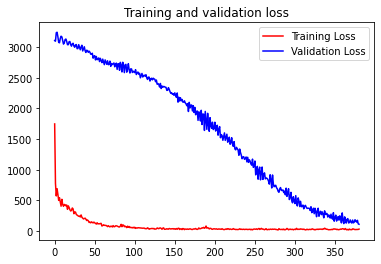

Score for fold 4: ['loss', 'mae'] of [109.28473663330078, 8.733490943908691]
------------------------------------------------------------------------
Training for fold 5 ...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 90, 90, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 45, 45, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_14 (C

2/2 [==============================] - 0s 15ms/step - loss: 49.7989 - mae: 5.6008 - val_loss: 1509.6700 - val_mae: 34.3681
Epoch 104/500
2/2 [==============================] - 0s 14ms/step - loss: 50.5692 - mae: 5.9056 - val_loss: 1539.0376 - val_mae: 34.7970
Epoch 105/500
2/2 [==============================] - 0s 15ms/step - loss: 47.9202 - mae: 5.1832 - val_loss: 1531.9222 - val_mae: 34.7064
Epoch 106/500
2/2 [==============================] - 0s 15ms/step - loss: 49.4640 - mae: 5.5084 - val_loss: 1521.4335 - val_mae: 34.5639
Epoch 107/500
2/2 [==============================] - 0s 15ms/step - loss: 55.0199 - mae: 5.9231 - val_loss: 1514.9739 - val_mae: 34.4814
Epoch 108/500
2/2 [==============================] - 0s 15ms/step - loss: 60.5684 - mae: 6.1632 - val_loss: 1483.0896 - val_mae: 34.0365
Epoch 109/500
2/2 [==============================] - 0s 15ms/step - loss: 39.3908 - mae: 5.1835 - val_loss: 1505.4938 - val_mae: 34.3689
Epoch 110/500
2/2 [==============================] - 0s

2/2 [==============================] - 0s 15ms/step - loss: 34.4011 - mae: 4.2126 - val_loss: 842.8539 - val_mae: 25.4221
Epoch 223/500
2/2 [==============================] - 0s 15ms/step - loss: 31.4395 - mae: 4.1536 - val_loss: 817.9247 - val_mae: 24.8855
Epoch 224/500
2/2 [==============================] - 0s 15ms/step - loss: 32.2827 - mae: 4.3003 - val_loss: 835.5648 - val_mae: 25.2047
Epoch 225/500
2/2 [==============================] - 0s 15ms/step - loss: 28.5179 - mae: 4.0337 - val_loss: 828.9224 - val_mae: 25.0616
Epoch 226/500
2/2 [==============================] - 0s 15ms/step - loss: 34.8376 - mae: 4.3667 - val_loss: 788.7293 - val_mae: 24.3061
Epoch 227/500
2/2 [==============================] - 0s 15ms/step - loss: 24.6219 - mae: 4.0643 - val_loss: 797.5535 - val_mae: 24.5445
Epoch 228/500
2/2 [==============================] - 0s 15ms/step - loss: 26.0664 - mae: 3.7881 - val_loss: 762.6161 - val_mae: 23.9430
Epoch 229/500
2/2 [==============================] - 0s 15ms/s

2/2 [==============================] - 0s 14ms/step - loss: 21.4465 - mae: 3.4527 - val_loss: 126.6298 - val_mae: 9.1561
Epoch 343/500
2/2 [==============================] - 0s 15ms/step - loss: 21.8530 - mae: 3.5660 - val_loss: 158.4679 - val_mae: 10.4371
Epoch 344/500
2/2 [==============================] - 0s 15ms/step - loss: 29.2053 - mae: 3.9643 - val_loss: 137.9428 - val_mae: 9.7690
Epoch 345/500
2/2 [==============================] - 0s 15ms/step - loss: 28.1589 - mae: 3.8638 - val_loss: 119.4422 - val_mae: 9.0834
Epoch 346/500
2/2 [==============================] - 0s 15ms/step - loss: 22.5668 - mae: 3.7222 - val_loss: 167.0488 - val_mae: 10.8316
Epoch 347/500
2/2 [==============================] - 0s 15ms/step - loss: 31.6853 - mae: 3.9094 - val_loss: 115.5334 - val_mae: 9.0048
Epoch 348/500
1/2 [==============>...............] - ETA: 0s - loss: 23.3003 - mae: 3.3530
Reached 110 val_loss so cancelling training!
2/2 [==============================] - 0s 15ms/step - loss: 21.248

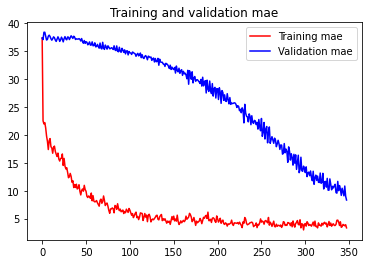

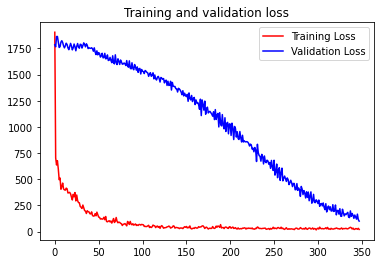

Score for fold 5: ['loss', 'mae'] of [100.46044921875, 8.330580711364746]
------------------------------------------------------------------------
Training for fold 6 ...
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 90, 90, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 45, 45, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_17 (Conv

2/2 [==============================] - 0s 15ms/step - loss: 157.1213 - mae: 9.8640 - val_loss: 1509.3354 - val_mae: 33.8615
Epoch 47/500
2/2 [==============================] - 0s 15ms/step - loss: 155.3260 - mae: 10.2123 - val_loss: 1516.1636 - val_mae: 33.9612
Epoch 48/500
2/2 [==============================] - 0s 14ms/step - loss: 141.4473 - mae: 9.6038 - val_loss: 1533.8746 - val_mae: 34.2111
Epoch 49/500
2/2 [==============================] - 0s 15ms/step - loss: 154.6672 - mae: 9.3706 - val_loss: 1508.6622 - val_mae: 33.8566
Epoch 50/500
2/2 [==============================] - 0s 14ms/step - loss: 154.0359 - mae: 9.7619 - val_loss: 1487.7579 - val_mae: 33.5607
Epoch 51/500
2/2 [==============================] - 0s 15ms/step - loss: 125.1772 - mae: 8.9194 - val_loss: 1478.6914 - val_mae: 33.4347
Epoch 52/500
2/2 [==============================] - 0s 15ms/step - loss: 118.8076 - mae: 8.8394 - val_loss: 1483.8527 - val_mae: 33.5130
Epoch 53/500
2/2 [==============================] - 0

Epoch 106/500
2/2 [==============================] - 0s 14ms/step - loss: 48.3963 - mae: 5.5755 - val_loss: 1357.5897 - val_mae: 32.0152
Epoch 107/500
2/2 [==============================] - 0s 14ms/step - loss: 58.8251 - mae: 5.6111 - val_loss: 1299.5001 - val_mae: 31.1373
Epoch 108/500
2/2 [==============================] - 0s 13ms/step - loss: 67.6595 - mae: 6.6959 - val_loss: 1300.4901 - val_mae: 31.1639
Epoch 109/500
2/2 [==============================] - 0s 14ms/step - loss: 42.0034 - mae: 5.1975 - val_loss: 1352.5071 - val_mae: 31.9696
Epoch 110/500
2/2 [==============================] - 0s 14ms/step - loss: 49.5210 - mae: 5.4654 - val_loss: 1332.8198 - val_mae: 31.6785
Epoch 111/500
2/2 [==============================] - 0s 14ms/step - loss: 46.7378 - mae: 5.1061 - val_loss: 1314.8864 - val_mae: 31.4040
Epoch 112/500
2/2 [==============================] - 0s 14ms/step - loss: 41.4448 - mae: 5.2204 - val_loss: 1328.6860 - val_mae: 31.6077
Epoch 113/500
2/2 [======================

Epoch 166/500
2/2 [==============================] - 0s 15ms/step - loss: 38.8125 - mae: 4.8923 - val_loss: 1092.5897 - val_mae: 28.4141
Epoch 167/500
2/2 [==============================] - 0s 14ms/step - loss: 37.8300 - mae: 4.7423 - val_loss: 1112.0796 - val_mae: 28.7568
Epoch 168/500
2/2 [==============================] - 0s 14ms/step - loss: 30.4509 - mae: 4.3224 - val_loss: 1058.9543 - val_mae: 27.9044
Epoch 169/500
2/2 [==============================] - 0s 14ms/step - loss: 22.1473 - mae: 3.6400 - val_loss: 1102.7163 - val_mae: 28.6635
Epoch 170/500
2/2 [==============================] - 0s 14ms/step - loss: 29.8342 - mae: 4.1411 - val_loss: 1097.5304 - val_mae: 28.6091
Epoch 171/500
2/2 [==============================] - 0s 14ms/step - loss: 31.4599 - mae: 4.5172 - val_loss: 1086.7699 - val_mae: 28.4487
Epoch 172/500
2/2 [==============================] - 0s 14ms/step - loss: 32.1896 - mae: 4.2584 - val_loss: 1095.5092 - val_mae: 28.5864
Epoch 173/500
2/2 [======================

2/2 [==============================] - 0s 15ms/step - loss: 27.3233 - mae: 4.1201 - val_loss: 748.4802 - val_mae: 23.0891
Epoch 227/500
2/2 [==============================] - 0s 15ms/step - loss: 28.3849 - mae: 3.8820 - val_loss: 763.2977 - val_mae: 23.4199
Epoch 228/500
2/2 [==============================] - 0s 15ms/step - loss: 22.6355 - mae: 3.4301 - val_loss: 702.9316 - val_mae: 22.2907
Epoch 229/500
2/2 [==============================] - 0s 14ms/step - loss: 35.5675 - mae: 4.4318 - val_loss: 825.1213 - val_mae: 24.6569
Epoch 230/500
2/2 [==============================] - 0s 15ms/step - loss: 43.1760 - mae: 5.1389 - val_loss: 724.9921 - val_mae: 22.7325
Epoch 231/500
2/2 [==============================] - 0s 15ms/step - loss: 32.1818 - mae: 4.2543 - val_loss: 645.3530 - val_mae: 21.0538
Epoch 232/500
2/2 [==============================] - 0s 15ms/step - loss: 42.2886 - mae: 5.0333 - val_loss: 812.1927 - val_mae: 24.3752
Epoch 233/500
2/2 [==============================] - 0s 15ms/s

2/2 [==============================] - 0s 15ms/step - loss: 23.3697 - mae: 3.4013 - val_loss: 368.1956 - val_mae: 15.1728
Epoch 287/500
2/2 [==============================] - 0s 14ms/step - loss: 27.5292 - mae: 4.0388 - val_loss: 386.0160 - val_mae: 15.6450
Epoch 288/500
2/2 [==============================] - 0s 15ms/step - loss: 21.7031 - mae: 3.6334 - val_loss: 392.6624 - val_mae: 15.7982
Epoch 289/500
2/2 [==============================] - 0s 14ms/step - loss: 20.7748 - mae: 3.4628 - val_loss: 339.4576 - val_mae: 14.2065
Epoch 290/500
2/2 [==============================] - 0s 14ms/step - loss: 28.6761 - mae: 4.2809 - val_loss: 395.9720 - val_mae: 15.9619
Epoch 291/500
2/2 [==============================] - 0s 14ms/step - loss: 38.6979 - mae: 4.4543 - val_loss: 384.6048 - val_mae: 15.6767
Epoch 292/500
2/2 [==============================] - 0s 15ms/step - loss: 39.6152 - mae: 4.6472 - val_loss: 301.1989 - val_mae: 13.2378
Epoch 293/500
2/2 [==============================] - 0s 14ms/s

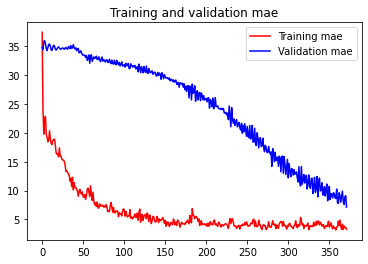

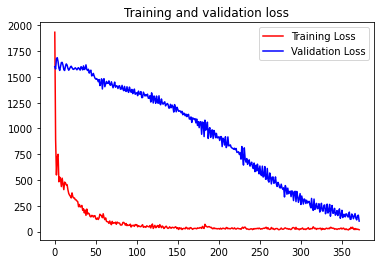

Score for fold 6: ['loss', 'mae'] of [102.3031234741211, 7.134715557098389]
------------------------------------------------------------------------
Training for fold 7 ...
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 90, 90, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 45, 45, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_20 (Co

2/2 [==============================] - 0s 15ms/step - loss: 77.9849 - mae: 7.0269 - val_loss: 1799.1171 - val_mae: 37.1556
Epoch 105/500
2/2 [==============================] - 0s 15ms/step - loss: 53.9886 - mae: 5.7392 - val_loss: 1820.6857 - val_mae: 37.4461
Epoch 106/500
2/2 [==============================] - 0s 15ms/step - loss: 64.4689 - mae: 6.0259 - val_loss: 1740.8058 - val_mae: 36.4380
Epoch 107/500
2/2 [==============================] - 0s 15ms/step - loss: 60.5344 - mae: 6.2380 - val_loss: 1761.0575 - val_mae: 36.7158
Epoch 108/500
2/2 [==============================] - 0s 15ms/step - loss: 53.0936 - mae: 5.6720 - val_loss: 1747.1907 - val_mae: 36.5527
Epoch 109/500
2/2 [==============================] - 0s 14ms/step - loss: 50.3104 - mae: 5.6556 - val_loss: 1726.7111 - val_mae: 36.3027
Epoch 110/500
2/2 [==============================] - 0s 15ms/step - loss: 55.9464 - mae: 6.0497 - val_loss: 1783.6749 - val_mae: 37.0523
Epoch 111/500
2/2 [==============================] - 0s

Epoch 164/500
2/2 [==============================] - 0s 15ms/step - loss: 37.5743 - mae: 4.6950 - val_loss: 1448.5109 - val_mae: 33.3075
Epoch 165/500
2/2 [==============================] - 0s 15ms/step - loss: 26.6432 - mae: 4.0145 - val_loss: 1378.1926 - val_mae: 32.2880
Epoch 166/500
2/2 [==============================] - 0s 15ms/step - loss: 31.1903 - mae: 4.5602 - val_loss: 1417.8688 - val_mae: 32.8830
Epoch 167/500
2/2 [==============================] - 0s 15ms/step - loss: 42.4540 - mae: 4.7456 - val_loss: 1404.5389 - val_mae: 32.7214
Epoch 168/500
2/2 [==============================] - 0s 15ms/step - loss: 30.2257 - mae: 4.3374 - val_loss: 1339.6826 - val_mae: 31.8215
Epoch 169/500
2/2 [==============================] - 0s 14ms/step - loss: 35.3478 - mae: 4.7492 - val_loss: 1446.9979 - val_mae: 33.3979
Epoch 170/500
2/2 [==============================] - 0s 14ms/step - loss: 37.9997 - mae: 4.7273 - val_loss: 1370.9282 - val_mae: 32.3434
Epoch 171/500
2/2 [======================

2/2 [==============================] - 0s 15ms/step - loss: 30.5355 - mae: 4.1722 - val_loss: 396.6683 - val_mae: 16.4218
Epoch 284/500
2/2 [==============================] - 0s 15ms/step - loss: 31.4897 - mae: 4.2688 - val_loss: 414.1519 - val_mae: 16.9561
Epoch 285/500
2/2 [==============================] - 0s 15ms/step - loss: 30.8079 - mae: 3.9403 - val_loss: 407.2447 - val_mae: 16.8049
Epoch 286/500
2/2 [==============================] - 0s 15ms/step - loss: 21.8464 - mae: 3.4983 - val_loss: 360.7911 - val_mae: 15.4646
Epoch 287/500
2/2 [==============================] - 0s 15ms/step - loss: 35.9140 - mae: 4.5583 - val_loss: 388.4907 - val_mae: 16.2503
Epoch 288/500
2/2 [==============================] - 0s 15ms/step - loss: 33.0821 - mae: 4.0565 - val_loss: 401.8663 - val_mae: 16.6049
Epoch 289/500
2/2 [==============================] - 0s 15ms/step - loss: 16.7896 - mae: 3.1220 - val_loss: 359.2773 - val_mae: 15.3570
Epoch 290/500
2/2 [==============================] - 0s 14ms/s

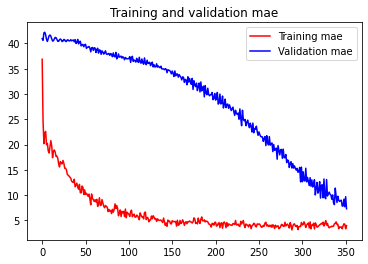

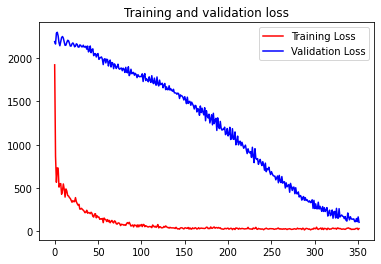

Score for fold 7: ['loss', 'mae'] of [104.6695327758789, 7.304328441619873]
------------------------------------------------------------------------
Training for fold 8 ...
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 90, 90, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 45, 45, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_23 (Co

2/2 [==============================] - 0s 15ms/step - loss: 82.2738 - mae: 7.2549 - val_loss: 1986.8423 - val_mae: 38.5297
Epoch 105/500
2/2 [==============================] - 0s 15ms/step - loss: 52.9882 - mae: 5.4771 - val_loss: 1991.1421 - val_mae: 38.5879
Epoch 106/500
2/2 [==============================] - 0s 15ms/step - loss: 58.5166 - mae: 5.8649 - val_loss: 1951.9546 - val_mae: 38.1125
Epoch 107/500
2/2 [==============================] - 0s 15ms/step - loss: 54.5858 - mae: 6.0385 - val_loss: 1939.1309 - val_mae: 37.9637
Epoch 108/500
2/2 [==============================] - 0s 15ms/step - loss: 55.3338 - mae: 5.8416 - val_loss: 1924.3634 - val_mae: 37.8005
Epoch 109/500
2/2 [==============================] - 0s 15ms/step - loss: 45.7278 - mae: 5.4984 - val_loss: 1924.7188 - val_mae: 37.8285
Epoch 110/500
2/2 [==============================] - 0s 15ms/step - loss: 62.4343 - mae: 6.4220 - val_loss: 1965.5363 - val_mae: 38.3445
Epoch 111/500
2/2 [==============================] - 0s

Epoch 164/500
2/2 [==============================] - 0s 15ms/step - loss: 32.8555 - mae: 4.4268 - val_loss: 1612.6346 - val_mae: 34.5404
Epoch 165/500
2/2 [==============================] - 0s 14ms/step - loss: 42.1717 - mae: 4.5455 - val_loss: 1503.0409 - val_mae: 33.0345
Epoch 166/500
2/2 [==============================] - 0s 15ms/step - loss: 45.7235 - mae: 5.2387 - val_loss: 1571.9950 - val_mae: 33.9951
Epoch 167/500
2/2 [==============================] - 0s 14ms/step - loss: 48.1143 - mae: 5.0666 - val_loss: 1561.9999 - val_mae: 33.8872
Epoch 168/500
2/2 [==============================] - 0s 14ms/step - loss: 36.4841 - mae: 4.6629 - val_loss: 1466.8843 - val_mae: 32.6140
Epoch 169/500
2/2 [==============================] - 0s 14ms/step - loss: 41.5090 - mae: 5.0181 - val_loss: 1611.5898 - val_mae: 34.6375
Epoch 170/500
2/2 [==============================] - 0s 14ms/step - loss: 48.2959 - mae: 5.3028 - val_loss: 1512.1691 - val_mae: 33.3142
Epoch 171/500
2/2 [======================

Epoch 283/500
2/2 [==============================] - 0s 14ms/step - loss: 28.9678 - mae: 4.3061 - val_loss: 583.4149 - val_mae: 20.1144
Epoch 284/500
2/2 [==============================] - 0s 14ms/step - loss: 27.8996 - mae: 4.1923 - val_loss: 467.2163 - val_mae: 17.1683
Epoch 285/500
2/2 [==============================] - 0s 15ms/step - loss: 33.6527 - mae: 4.3998 - val_loss: 528.9848 - val_mae: 18.7689
Epoch 286/500
2/2 [==============================] - 0s 15ms/step - loss: 23.8068 - mae: 3.5213 - val_loss: 522.1118 - val_mae: 18.6803
Epoch 287/500
2/2 [==============================] - 0s 14ms/step - loss: 46.5968 - mae: 5.0591 - val_loss: 482.8593 - val_mae: 17.7629
Epoch 288/500
2/2 [==============================] - 0s 14ms/step - loss: 31.6610 - mae: 4.1880 - val_loss: 511.1175 - val_mae: 18.5376
Epoch 289/500
2/2 [==============================] - 0s 14ms/step - loss: 22.0122 - mae: 3.4871 - val_loss: 459.1854 - val_mae: 17.2712
Epoch 290/500
2/2 [=============================

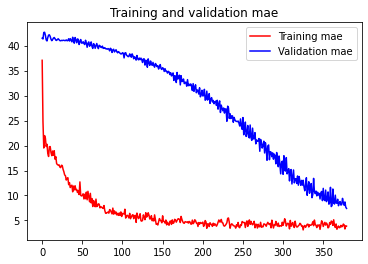

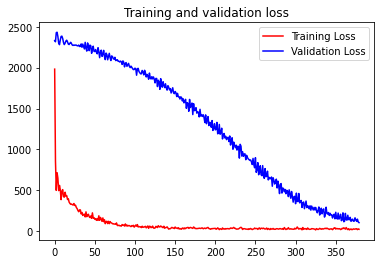

Score for fold 8: ['loss', 'mae'] of [106.22187042236328, 7.412942886352539]
------------------------------------------------------------------------
Training for fold 9 ...
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 90, 90, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 45, 45, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_26 (C

2/2 [==============================] - 0s 14ms/step - loss: 56.9010 - mae: 6.0754 - val_loss: 1551.7590 - val_mae: 31.9676
Epoch 105/500
2/2 [==============================] - 0s 15ms/step - loss: 52.4845 - mae: 5.6566 - val_loss: 1512.5055 - val_mae: 31.3998
Epoch 106/500
2/2 [==============================] - 0s 14ms/step - loss: 52.7446 - mae: 5.6317 - val_loss: 1519.4805 - val_mae: 31.5269
Epoch 107/500
2/2 [==============================] - 0s 14ms/step - loss: 52.7940 - mae: 5.5057 - val_loss: 1516.4902 - val_mae: 31.5112
Epoch 108/500
2/2 [==============================] - 0s 15ms/step - loss: 61.5438 - mae: 6.4123 - val_loss: 1455.7399 - val_mae: 30.6236
Epoch 109/500
2/2 [==============================] - 0s 15ms/step - loss: 46.7231 - mae: 5.5153 - val_loss: 1538.3403 - val_mae: 31.9121
Epoch 110/500
2/2 [==============================] - 0s 15ms/step - loss: 61.8920 - mae: 5.9359 - val_loss: 1505.1641 - val_mae: 31.4243
Epoch 111/500
2/2 [==============================] - 0s

2/2 [==============================] - 0s 14ms/step - loss: 36.6289 - mae: 4.4681 - val_loss: 802.8503 - val_mae: 21.6039
Epoch 224/500
2/2 [==============================] - 0s 14ms/step - loss: 36.5365 - mae: 4.5531 - val_loss: 799.7459 - val_mae: 21.5744
Epoch 225/500
2/2 [==============================] - 0s 14ms/step - loss: 30.7577 - mae: 4.4456 - val_loss: 826.2504 - val_mae: 22.2088
Epoch 226/500
2/2 [==============================] - 0s 14ms/step - loss: 27.3519 - mae: 3.8560 - val_loss: 785.4097 - val_mae: 21.3886
Epoch 227/500
2/2 [==============================] - 0s 14ms/step - loss: 17.8776 - mae: 3.3225 - val_loss: 789.2135 - val_mae: 21.4938
Epoch 228/500
2/2 [==============================] - 0s 14ms/step - loss: 21.5532 - mae: 3.2504 - val_loss: 775.1147 - val_mae: 21.1992
Epoch 229/500
2/2 [==============================] - 0s 15ms/step - loss: 25.1594 - mae: 3.6629 - val_loss: 783.1733 - val_mae: 21.3883
Epoch 230/500
2/2 [==============================] - 0s 15ms/s

2/2 [==============================] - 0s 14ms/step - loss: 20.9238 - mae: 3.4258 - val_loss: 157.4823 - val_mae: 8.2455
Epoch 344/500
2/2 [==============================] - 0s 15ms/step - loss: 25.2675 - mae: 3.7533 - val_loss: 158.4419 - val_mae: 8.2231
Epoch 345/500
2/2 [==============================] - 0s 16ms/step - loss: 21.4178 - mae: 3.3182 - val_loss: 143.5622 - val_mae: 7.7965
Epoch 346/500
2/2 [==============================] - 0s 14ms/step - loss: 26.5438 - mae: 3.6927 - val_loss: 148.6546 - val_mae: 7.8869
Epoch 347/500
2/2 [==============================] - 0s 15ms/step - loss: 30.1923 - mae: 3.7946 - val_loss: 141.9731 - val_mae: 7.6068
Epoch 348/500
2/2 [==============================] - 0s 15ms/step - loss: 23.5329 - mae: 3.4218 - val_loss: 142.2459 - val_mae: 7.6528
Epoch 349/500
2/2 [==============================] - 0s 15ms/step - loss: 26.7508 - mae: 3.9697 - val_loss: 155.9104 - val_mae: 8.0522
Epoch 350/500
2/2 [==============================] - 0s 15ms/step - l

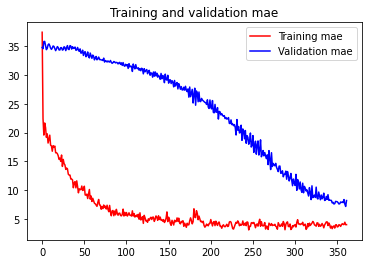

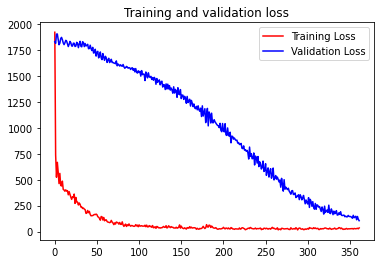

Score for fold 9: ['loss', 'mae'] of [104.96100616455078, 8.201024055480957]
------------------------------------------------------------------------
Training for fold 10 ...
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 90, 90, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 45, 45, 32)        128       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_29 (

Epoch 104/500
2/2 [==============================] - 0s 15ms/step - loss: 52.1641 - mae: 5.8256 - val_loss: 1368.9121 - val_mae: 31.8423
Epoch 105/500
2/2 [==============================] - 0s 15ms/step - loss: 57.6885 - mae: 6.4101 - val_loss: 1378.2775 - val_mae: 31.9825
Epoch 106/500
2/2 [==============================] - 0s 15ms/step - loss: 63.7542 - mae: 6.1305 - val_loss: 1394.8984 - val_mae: 32.2235
Epoch 107/500
2/2 [==============================] - 0s 16ms/step - loss: 66.7428 - mae: 6.2157 - val_loss: 1355.5350 - val_mae: 31.6524
Epoch 108/500
2/2 [==============================] - 0s 14ms/step - loss: 63.5479 - mae: 6.1235 - val_loss: 1322.4464 - val_mae: 31.1646
Epoch 109/500
2/2 [==============================] - 0s 15ms/step - loss: 51.4270 - mae: 5.8239 - val_loss: 1362.9843 - val_mae: 31.7805
Epoch 110/500
2/2 [==============================] - 0s 15ms/step - loss: 58.1988 - mae: 5.8761 - val_loss: 1394.7128 - val_mae: 32.2506
Epoch 111/500
2/2 [======================

Epoch 164/500
2/2 [==============================] - 0s 14ms/step - loss: 38.4227 - mae: 4.6881 - val_loss: 1106.5203 - val_mae: 28.4407
Epoch 165/500
2/2 [==============================] - 0s 14ms/step - loss: 36.1004 - mae: 4.3381 - val_loss: 1075.5770 - val_mae: 27.9347
Epoch 166/500
2/2 [==============================] - 0s 14ms/step - loss: 32.3097 - mae: 4.5439 - val_loss: 1078.7141 - val_mae: 28.0029
Epoch 167/500
2/2 [==============================] - 0s 15ms/step - loss: 34.2805 - mae: 4.5986 - val_loss: 1109.4734 - val_mae: 28.5164
Epoch 168/500
2/2 [==============================] - 0s 15ms/step - loss: 37.6629 - mae: 4.9203 - val_loss: 1045.3893 - val_mae: 27.4608
Epoch 169/500
2/2 [==============================] - 0s 14ms/step - loss: 36.2742 - mae: 4.7376 - val_loss: 1107.4972 - val_mae: 28.5034
Epoch 170/500
2/2 [==============================] - 0s 14ms/step - loss: 38.5478 - mae: 4.5084 - val_loss: 1080.9386 - val_mae: 28.0876
Epoch 171/500
2/2 [======================

2/2 [==============================] - 0s 14ms/step - loss: 43.7276 - mae: 4.8516 - val_loss: 802.2901 - val_mae: 23.9079
Epoch 225/500
2/2 [==============================] - 0s 15ms/step - loss: 35.4752 - mae: 4.6304 - val_loss: 703.5766 - val_mae: 21.9281
Epoch 226/500
2/2 [==============================] - 0s 15ms/step - loss: 39.6395 - mae: 4.8647 - val_loss: 771.0209 - val_mae: 23.3196
Epoch 227/500
2/2 [==============================] - 0s 13ms/step - loss: 42.7037 - mae: 5.0373 - val_loss: 744.1655 - val_mae: 22.7771
Epoch 228/500
2/2 [==============================] - 0s 14ms/step - loss: 27.9078 - mae: 3.8569 - val_loss: 689.0048 - val_mae: 21.6337
Epoch 229/500
2/2 [==============================] - 0s 14ms/step - loss: 22.7309 - mae: 3.7307 - val_loss: 777.5373 - val_mae: 23.4701
Epoch 230/500
2/2 [==============================] - 0s 15ms/step - loss: 37.9738 - mae: 4.7603 - val_loss: 684.4667 - val_mae: 21.5548
Epoch 231/500
2/2 [==============================] - 0s 15ms/s

2/2 [==============================] - 0s 15ms/step - loss: 26.9061 - mae: 4.0198 - val_loss: 162.8490 - val_mae: 10.5748
Epoch 345/500
2/2 [==============================] - 0s 15ms/step - loss: 25.1728 - mae: 3.7628 - val_loss: 177.9329 - val_mae: 11.0588
Epoch 346/500
2/2 [==============================] - 0s 14ms/step - loss: 26.2122 - mae: 3.8771 - val_loss: 159.5441 - val_mae: 10.4237
Epoch 347/500
2/2 [==============================] - 0s 15ms/step - loss: 26.1163 - mae: 3.5837 - val_loss: 151.7386 - val_mae: 10.1439
Epoch 348/500
2/2 [==============================] - 0s 15ms/step - loss: 29.9051 - mae: 4.0775 - val_loss: 172.3610 - val_mae: 10.8779
Epoch 349/500
2/2 [==============================] - 0s 15ms/step - loss: 35.8276 - mae: 4.5221 - val_loss: 162.7429 - val_mae: 10.5454
Epoch 350/500
2/2 [==============================] - 0s 15ms/step - loss: 30.7022 - mae: 3.9558 - val_loss: 159.7703 - val_mae: 10.4431
Epoch 351/500
2/2 [==============================] - 0s 15ms/s

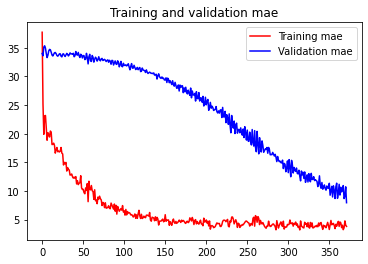

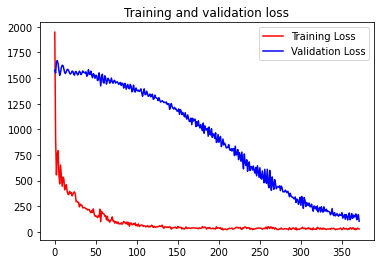

Score for fold 10: ['loss', 'mae'] of [103.25199890136719, 7.953892707824707]
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 163.9345245361328 - MAE: 10.403288841247559
------------------------------------------------------------------------
> Fold 2 - Loss: 107.72364044189453 - MAE: 8.624066352844238
------------------------------------------------------------------------
> Fold 3 - Loss: 103.8552017211914 - MAE: 7.658777236938477
------------------------------------------------------------------------
> Fold 4 - Loss: 109.28473663330078 - MAE: 8.733490943908691
------------------------------------------------------------------------
> Fold 5 - Loss: 100.46044921875 - MAE: 8.330580711364746
------------------------------------------------------------------------
> Fold 6 - Loss: 102.3031234741211 - MAE: 7.134715557098389
-----------------------------------

In [26]:
from sklearn.model_selection import StratifiedKFold , KFold ,RepeatedKFold

kfold = KFold(n_splits=10,shuffle=True,random_state=42)
mae_per_fold = []
loss_per_fold = []
n_epochs = []

# Variable for keeping count of split we are executing
fold_no = 1

# K-fold Train and test for each split
for train,test in list(kfold.split(train_data,Y)):

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    age_model = build_model(1, activation='relu', loss='mean_squared_error')
    age_model.summary()
    age_history = age_model.fit(
        train_data[train], Y[train],
        validation_data = (train_data[test], Y[test]),
        callbacks=[callback],
        batch_size=64,
        epochs=500,
        verbose=1
    )
    
    %matplotlib inline
    mae = age_history.history['mae']
    val_mae = age_history.history['val_mae']
    loss = age_history.history['loss']
    val_loss = age_history.history['val_loss']

    epochs = range(len(mae))

    plt.plot(epochs, mae, 'r', label='Training mae')
    plt.plot(epochs, val_mae, 'b', label='Validation mae')
    plt.title('Training and validation mae')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
    # Generate generalization metrics
    scores = age_model.evaluate(train_data[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {age_model.metrics_names} of {scores}')
    mae_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])
    n_epochs.append(len(mae))

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(mae_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - MAE: {mae_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> MAE: {np.mean(mae_per_fold)} (+- {np.std(mae_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Epochs: {np.mean(n_epochs)}')
print('------------------------------------------------------------------------')

In [27]:
age_model = build_model(1, activation='relu', loss='mean_squared_error')
age_model.summary()
age_history = age_model.fit(
    train_data,
    Y,
    batch_size=64,
    epochs=int(math.ceil(np.mean(n_epochs))),
    verbose=1
)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 90, 90, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 45, 45, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 19, 19, 128)       73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 9, 9, 128)       

2/2 [==============================] - 0s 15ms/step - loss: 86.3212 - mae: 7.5259
Epoch 68/381
2/2 [==============================] - 0s 16ms/step - loss: 102.4954 - mae: 8.1650
Epoch 69/381
2/2 [==============================] - 0s 14ms/step - loss: 105.7928 - mae: 8.3416
Epoch 70/381
2/2 [==============================] - 0s 15ms/step - loss: 93.5431 - mae: 7.8785
Epoch 71/381
2/2 [==============================] - 0s 15ms/step - loss: 106.1130 - mae: 8.1954
Epoch 72/381
2/2 [==============================] - 0s 15ms/step - loss: 90.7537 - mae: 7.6822
Epoch 73/381
2/2 [==============================] - 0s 15ms/step - loss: 74.4510 - mae: 6.9490
Epoch 74/381
2/2 [==============================] - 0s 15ms/step - loss: 86.1877 - mae: 7.4460
Epoch 75/381
2/2 [==============================] - 0s 15ms/step - loss: 97.0992 - mae: 7.3824
Epoch 76/381
2/2 [==============================] - 0s 15ms/step - loss: 64.5130 - mae: 6.5101
Epoch 77/381
2/2 [==============================] - 0s 15ms/

2/2 [==============================] - 0s 15ms/step - loss: 32.6915 - mae: 4.3722
Epoch 238/381
2/2 [==============================] - 0s 15ms/step - loss: 34.2259 - mae: 4.4216
Epoch 239/381
2/2 [==============================] - 0s 16ms/step - loss: 35.0801 - mae: 4.4263
Epoch 240/381
2/2 [==============================] - 0s 16ms/step - loss: 25.8276 - mae: 3.8167
Epoch 241/381
2/2 [==============================] - 0s 15ms/step - loss: 24.3134 - mae: 3.8463
Epoch 242/381
2/2 [==============================] - 0s 15ms/step - loss: 25.3200 - mae: 3.6787
Epoch 243/381
2/2 [==============================] - 0s 15ms/step - loss: 31.3183 - mae: 4.1647
Epoch 244/381
2/2 [==============================] - 0s 16ms/step - loss: 33.2270 - mae: 4.2687
Epoch 245/381
2/2 [==============================] - 0s 16ms/step - loss: 29.5773 - mae: 4.2040
Epoch 246/381
2/2 [==============================] - 0s 16ms/step - loss: 31.8923 - mae: 4.2732
Epoch 247/381
2/2 [==============================] - 0

2/2 [==============================] - 0s 16ms/step - loss: 42.1820 - mae: 4.9010
Epoch 323/381
2/2 [==============================] - 0s 14ms/step - loss: 25.9136 - mae: 3.8243
Epoch 324/381
2/2 [==============================] - 0s 15ms/step - loss: 41.3381 - mae: 4.7532
Epoch 325/381
2/2 [==============================] - 0s 15ms/step - loss: 39.6691 - mae: 4.6724
Epoch 326/381
2/2 [==============================] - 0s 14ms/step - loss: 31.2464 - mae: 4.0497
Epoch 327/381
2/2 [==============================] - 0s 15ms/step - loss: 41.5373 - mae: 4.9802
Epoch 328/381
2/2 [==============================] - 0s 15ms/step - loss: 38.0338 - mae: 4.5110
Epoch 329/381
2/2 [==============================] - 0s 15ms/step - loss: 29.5766 - mae: 3.9124
Epoch 330/381
2/2 [==============================] - 0s 15ms/step - loss: 38.1663 - mae: 4.6991
Epoch 331/381
2/2 [==============================] - 0s 15ms/step - loss: 33.2396 - mae: 4.3740
Epoch 332/381
2/2 [==============================] - 0

In [28]:
test_data = test_data.reshape(test_data.shape[0],90,90,1)

In [29]:
pred=age_model.predict(test_data)
print(pred)

[[23.458115]
 [19.295652]
 [16.677563]
 [21.92779 ]
 [19.63497 ]
 [22.012938]
 [45.493404]
 [36.721172]
 [47.759583]
 [58.47741 ]
 [54.624565]
 [61.413452]
 [61.16623 ]
 [57.008354]
 [12.470922]
 [13.353117]
 [16.939587]
 [31.95643 ]
 [17.119007]
 [20.51771 ]
 [44.79722 ]
 [55.249893]
 [47.232643]
 [62.116547]
 [41.12667 ]
 [52.14163 ]
 [46.18911 ]
 [53.08471 ]]


#### Model with all features

In [30]:
def build_model2(num_classes, activation='relu', loss='mean_squared_error'):
    reset_random_seeds()
    
    first_input= L.Input((90,90,1))
    second_input = L.Input((2,))
    model = L.Conv2D(32,(3,3),padding='same',activation='relu')(first_input)
    model = L.MaxPool2D(2,2)(model)
    model = L.BatchNormalization()(model)

    model = L.Conv2D(64,(3,3),activation='relu')(model)
    model = L.MaxPool2D(2,2)(model)

    model = L.Conv2D(128,(3,3),activation='relu')(model)
    model = L.MaxPool2D(2,2)(model)
    

    model = L.Flatten()(model)
    model = L.concatenate([model,second_input], axis=1)

    model = L.Dense(64, activation='relu')(model)
    model = L.Dropout(0.2)(model)
    predictions = L.Dense(num_classes,activation="relu")(model)

    
    model = Model(inputs=[first_input,second_input], outputs=predictions)
    
    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['mae']
    )
    
    return model

------------------------------------------------------------------------
Training for fold 1 ...
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 90, 90, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_33 (MaxPooling2D) (None, 45, 45, 32)   0           conv2d_33[0][0]                  
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 45, 45, 32)   128         max_pooling2d_33[0][0]  

Epoch 95/500
2/2 [==============================] - 0s 15ms/step - loss: 52.0970 - mae: 5.7626 - val_loss: 2920.3821 - val_mae: 51.5624
Epoch 96/500
2/2 [==============================] - 0s 15ms/step - loss: 58.4749 - mae: 5.9506 - val_loss: 2921.6223 - val_mae: 51.5804
Epoch 97/500
2/2 [==============================] - 0s 15ms/step - loss: 38.4644 - mae: 4.9985 - val_loss: 2917.2722 - val_mae: 51.5438
Epoch 98/500
2/2 [==============================] - 0s 15ms/step - loss: 60.8967 - mae: 6.0950 - val_loss: 2875.7156 - val_mae: 51.1575
Epoch 99/500
2/2 [==============================] - 0s 15ms/step - loss: 52.5996 - mae: 5.8316 - val_loss: 2895.9832 - val_mae: 51.3451
Epoch 100/500
2/2 [==============================] - 0s 15ms/step - loss: 39.5316 - mae: 4.9610 - val_loss: 2913.5125 - val_mae: 51.5057
Epoch 101/500
2/2 [==============================] - 0s 15ms/step - loss: 67.8697 - mae: 6.3252 - val_loss: 2833.5032 - val_mae: 50.7581
Epoch 102/500
2/2 [===========================

Epoch 155/500
2/2 [==============================] - 0s 15ms/step - loss: 48.6212 - mae: 5.3248 - val_loss: 2455.1191 - val_mae: 47.2310
Epoch 156/500
2/2 [==============================] - 0s 15ms/step - loss: 33.2298 - mae: 4.6992 - val_loss: 2393.0349 - val_mae: 46.5882
Epoch 157/500
2/2 [==============================] - 0s 15ms/step - loss: 33.2212 - mae: 4.5674 - val_loss: 2517.3210 - val_mae: 47.8542
Epoch 158/500
2/2 [==============================] - 0s 15ms/step - loss: 45.4542 - mae: 5.1412 - val_loss: 2456.2566 - val_mae: 47.2377
Epoch 159/500
2/2 [==============================] - 0s 15ms/step - loss: 42.1011 - mae: 4.9587 - val_loss: 2338.5088 - val_mae: 46.0265
Epoch 160/500
2/2 [==============================] - 0s 15ms/step - loss: 37.7460 - mae: 4.8869 - val_loss: 2496.4412 - val_mae: 47.6561
Epoch 161/500
2/2 [==============================] - 0s 15ms/step - loss: 49.7454 - mae: 5.0418 - val_loss: 2424.3213 - val_mae: 46.9317
Epoch 162/500
2/2 [======================

Epoch 215/500
2/2 [==============================] - 0s 14ms/step - loss: 27.1217 - mae: 4.0728 - val_loss: 1858.1285 - val_mae: 41.0257
Epoch 216/500
2/2 [==============================] - 0s 15ms/step - loss: 23.6970 - mae: 3.7343 - val_loss: 1780.4098 - val_mae: 40.1022
Epoch 217/500
2/2 [==============================] - 0s 14ms/step - loss: 33.5675 - mae: 4.2660 - val_loss: 1654.4121 - val_mae: 38.5384
Epoch 218/500
2/2 [==============================] - 0s 15ms/step - loss: 43.1534 - mae: 5.3007 - val_loss: 1818.7963 - val_mae: 40.5551
Epoch 219/500
2/2 [==============================] - 0s 15ms/step - loss: 31.8641 - mae: 4.3042 - val_loss: 1732.3428 - val_mae: 39.5009
Epoch 220/500
2/2 [==============================] - 0s 15ms/step - loss: 19.3678 - mae: 3.3352 - val_loss: 1688.2046 - val_mae: 38.9452
Epoch 221/500
2/2 [==============================] - 0s 14ms/step - loss: 30.3977 - mae: 4.1949 - val_loss: 1749.8346 - val_mae: 39.7004
Epoch 222/500
2/2 [======================

Epoch 275/500
2/2 [==============================] - 0s 15ms/step - loss: 30.7162 - mae: 4.1964 - val_loss: 955.6667 - val_mae: 28.7548
Epoch 276/500
2/2 [==============================] - 0s 15ms/step - loss: 27.5574 - mae: 3.8541 - val_loss: 1098.2665 - val_mae: 31.1276
Epoch 277/500
2/2 [==============================] - 0s 16ms/step - loss: 33.5467 - mae: 4.1311 - val_loss: 914.1663 - val_mae: 28.0845
Epoch 278/500
2/2 [==============================] - 0s 15ms/step - loss: 29.5800 - mae: 4.0617 - val_loss: 889.3657 - val_mae: 27.6685
Epoch 279/500
2/2 [==============================] - 0s 15ms/step - loss: 33.0266 - mae: 4.4488 - val_loss: 1061.4349 - val_mae: 30.5742
Epoch 280/500
2/2 [==============================] - 0s 15ms/step - loss: 31.9622 - mae: 4.3438 - val_loss: 840.3972 - val_mae: 26.7600
Epoch 281/500
2/2 [==============================] - 0s 15ms/step - loss: 36.5171 - mae: 4.7276 - val_loss: 934.5104 - val_mae: 28.4085
Epoch 282/500
2/2 [===========================

2/2 [==============================] - 0s 15ms/step - loss: 18.9516 - mae: 3.2280 - val_loss: 245.4891 - val_mae: 13.2691
Epoch 396/500
2/2 [==============================] - 0s 15ms/step - loss: 20.4378 - mae: 3.1393 - val_loss: 234.2198 - val_mae: 12.9718
Epoch 397/500
2/2 [==============================] - ETA: 0s - loss: 23.6599 - mae: 3.70 - 0s 15ms/step - loss: 26.4460 - mae: 3.7788 - val_loss: 318.0707 - val_mae: 15.7014
Epoch 398/500
2/2 [==============================] - 0s 15ms/step - loss: 27.8245 - mae: 3.8277 - val_loss: 245.6758 - val_mae: 13.4236
Epoch 399/500
2/2 [==============================] - 0s 15ms/step - loss: 16.2188 - mae: 2.9839 - val_loss: 227.1068 - val_mae: 12.8458
Epoch 400/500
2/2 [==============================] - 0s 15ms/step - loss: 21.3959 - mae: 3.5408 - val_loss: 278.5844 - val_mae: 14.5275
Epoch 401/500
2/2 [==============================] - 0s 17ms/step - loss: 34.6907 - mae: 4.0769 - val_loss: 250.4563 - val_mae: 13.4384
Epoch 402/500
2/2 [=====

2/2 [==============================] - 0s 15ms/step - loss: 29.6312 - mae: 4.0938 - val_loss: 218.6434 - val_mae: 12.2474
Epoch 456/500
2/2 [==============================] - 0s 15ms/step - loss: 32.2122 - mae: 3.9364 - val_loss: 265.3352 - val_mae: 13.8123
Epoch 457/500
2/2 [==============================] - 0s 15ms/step - loss: 30.1001 - mae: 3.9832 - val_loss: 169.1013 - val_mae: 10.6833
Epoch 458/500
2/2 [==============================] - 0s 15ms/step - loss: 20.0096 - mae: 3.6023 - val_loss: 195.9036 - val_mae: 11.8454
Epoch 459/500
2/2 [==============================] - 0s 15ms/step - loss: 20.6034 - mae: 3.3748 - val_loss: 226.2600 - val_mae: 12.9115
Epoch 460/500
2/2 [==============================] - 0s 15ms/step - loss: 23.9363 - mae: 3.6084 - val_loss: 183.7247 - val_mae: 11.5815
Epoch 461/500
2/2 [==============================] - 0s 15ms/step - loss: 35.1080 - mae: 3.9971 - val_loss: 156.5890 - val_mae: 10.7161
Epoch 462/500
2/2 [==============================] - 0s 15ms/s

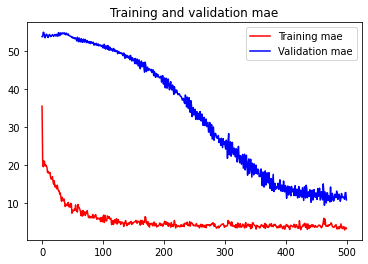

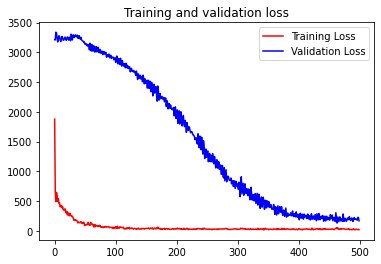

Score for fold 1: ['loss', 'mae'] of [166.87513732910156, 10.72644329071045]
------------------------------------------------------------------------
Training for fold 2 ...
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 90, 90, 32)   320         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_36 (MaxPooling2D) (None, 45, 45, 32)   0           conv2d_36[0][0]                  
__________________________________________________________________________________________________
batch_normal

2/2 [==============================] - 0s 14ms/step - loss: 52.9995 - mae: 5.7256 - val_loss: 2237.3096 - val_mae: 43.4681
Epoch 94/500
2/2 [==============================] - 0s 14ms/step - loss: 50.3352 - mae: 5.6664 - val_loss: 2274.9294 - val_mae: 43.8794
Epoch 95/500
2/2 [==============================] - 0s 14ms/step - loss: 49.3151 - mae: 5.7075 - val_loss: 2238.3835 - val_mae: 43.4912
Epoch 96/500
2/2 [==============================] - 0s 13ms/step - loss: 52.0079 - mae: 5.6388 - val_loss: 2215.2581 - val_mae: 43.2408
Epoch 97/500
2/2 [==============================] - 0s 13ms/step - loss: 42.7218 - mae: 5.0924 - val_loss: 2268.3850 - val_mae: 43.8079
Epoch 98/500
2/2 [==============================] - 0s 13ms/step - loss: 71.6462 - mae: 6.4109 - val_loss: 2194.7258 - val_mae: 43.0179
Epoch 99/500
2/2 [==============================] - 0s 13ms/step - loss: 51.2250 - mae: 5.6806 - val_loss: 2215.1956 - val_mae: 43.2433
Epoch 100/500
2/2 [==============================] - 0s 14ms/

2/2 [==============================] - 0s 14ms/step - loss: 29.2389 - mae: 4.4019 - val_loss: 1321.1768 - val_mae: 33.1317
Epoch 212/500
2/2 [==============================] - 0s 14ms/step - loss: 24.7035 - mae: 3.7155 - val_loss: 1363.2816 - val_mae: 33.7354
Epoch 213/500
2/2 [==============================] - 0s 14ms/step - loss: 28.6015 - mae: 4.0768 - val_loss: 1292.8210 - val_mae: 32.7528
Epoch 214/500
2/2 [==============================] - 0s 14ms/step - loss: 19.4529 - mae: 3.5464 - val_loss: 1224.6002 - val_mae: 31.7857
Epoch 215/500
2/2 [==============================] - 0s 13ms/step - loss: 25.5505 - mae: 3.9209 - val_loss: 1287.9459 - val_mae: 32.7338
Epoch 216/500
2/2 [==============================] - 0s 14ms/step - loss: 26.6598 - mae: 3.6992 - val_loss: 1257.2994 - val_mae: 32.3187
Epoch 217/500
2/2 [==============================] - 0s 14ms/step - loss: 33.3583 - mae: 4.0358 - val_loss: 1165.3154 - val_mae: 30.9802
Epoch 218/500
2/2 [==============================] - 0s

Epoch 330/500
2/2 [==============================] - 0s 13ms/step - loss: 36.6981 - mae: 4.3123 - val_loss: 255.5135 - val_mae: 12.6855
Epoch 331/500
2/2 [==============================] - 0s 14ms/step - loss: 25.7283 - mae: 3.7599 - val_loss: 185.0171 - val_mae: 10.3013
Epoch 332/500
2/2 [==============================] - 0s 13ms/step - loss: 23.2667 - mae: 3.9262 - val_loss: 260.2967 - val_mae: 12.9729
Epoch 333/500
2/2 [==============================] - 0s 13ms/step - loss: 35.4183 - mae: 4.1495 - val_loss: 242.2424 - val_mae: 12.3931
Epoch 334/500
2/2 [==============================] - 0s 13ms/step - loss: 34.4141 - mae: 3.9755 - val_loss: 149.4389 - val_mae: 9.2897
Epoch 335/500
2/2 [==============================] - 0s 13ms/step - loss: 36.8708 - mae: 4.8559 - val_loss: 228.5239 - val_mae: 11.8915
Epoch 336/500
2/2 [==============================] - 0s 14ms/step - loss: 27.6302 - mae: 3.8091 - val_loss: 252.1588 - val_mae: 12.6242
Epoch 337/500
2/2 [==============================

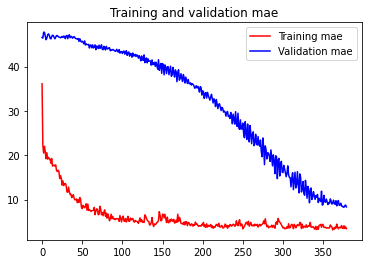

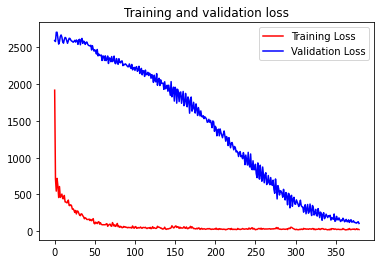

Score for fold 2: ['loss', 'mae'] of [106.146240234375, 8.350674629211426]
------------------------------------------------------------------------
Training for fold 3 ...
Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 90, 90, 32)   320         input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_39 (MaxPooling2D) (None, 45, 45, 32)   0           conv2d_39[0][0]                  
__________________________________________________________________________________________________
batch_normaliz

Epoch 94/500
2/2 [==============================] - 0s 14ms/step - loss: 58.5427 - mae: 5.7777 - val_loss: 1797.0206 - val_mae: 37.7101
Epoch 95/500
2/2 [==============================] - 0s 14ms/step - loss: 47.1571 - mae: 5.4662 - val_loss: 1799.1583 - val_mae: 37.7552
Epoch 96/500
2/2 [==============================] - 0s 14ms/step - loss: 44.4906 - mae: 5.4390 - val_loss: 1800.6652 - val_mae: 37.7953
Epoch 97/500
2/2 [==============================] - 0s 14ms/step - loss: 47.2967 - mae: 5.4559 - val_loss: 1783.5671 - val_mae: 37.6190
Epoch 98/500
2/2 [==============================] - 0s 14ms/step - loss: 49.7498 - mae: 5.6544 - val_loss: 1812.1536 - val_mae: 37.9532
Epoch 99/500
2/2 [==============================] - 0s 15ms/step - loss: 55.8375 - mae: 5.6642 - val_loss: 1786.7466 - val_mae: 37.6749
Epoch 100/500
2/2 [==============================] - 0s 14ms/step - loss: 45.6334 - mae: 5.4095 - val_loss: 1777.9550 - val_mae: 37.5754
Epoch 101/500
2/2 [============================

2/2 [==============================] - 0s 15ms/step - loss: 24.6560 - mae: 3.6438 - val_loss: 1125.1671 - val_mae: 30.2337
Epoch 213/500
2/2 [==============================] - 0s 15ms/step - loss: 21.5663 - mae: 3.4576 - val_loss: 1124.0874 - val_mae: 30.2473
Epoch 214/500
2/2 [==============================] - 0s 15ms/step - loss: 25.3206 - mae: 3.9053 - val_loss: 1049.7323 - val_mae: 29.1392
Epoch 215/500
2/2 [==============================] - 0s 16ms/step - loss: 34.4510 - mae: 4.3630 - val_loss: 1095.5197 - val_mae: 29.8110
Epoch 216/500
2/2 [==============================] - 0s 15ms/step - loss: 34.9915 - mae: 4.2900 - val_loss: 1066.9698 - val_mae: 29.3740
Epoch 217/500
2/2 [==============================] - 0s 15ms/step - loss: 30.8136 - mae: 4.1858 - val_loss: 1061.1429 - val_mae: 29.3041
Epoch 218/500
2/2 [==============================] - 0s 15ms/step - loss: 31.7901 - mae: 4.0830 - val_loss: 1014.9216 - val_mae: 28.6120
Epoch 219/500
2/2 [==============================] - 0s

Epoch 272/500
2/2 [==============================] - 0s 15ms/step - loss: 28.6007 - mae: 3.8651 - val_loss: 531.3812 - val_mae: 20.5825
Epoch 273/500
2/2 [==============================] - 0s 15ms/step - loss: 21.7953 - mae: 3.9034 - val_loss: 577.5198 - val_mae: 21.6256
Epoch 274/500
2/2 [==============================] - 0s 15ms/step - loss: 15.8770 - mae: 2.9612 - val_loss: 576.6075 - val_mae: 21.6263
Epoch 275/500
2/2 [==============================] - 0s 16ms/step - loss: 27.5505 - mae: 3.6965 - val_loss: 542.6537 - val_mae: 20.8518
Epoch 276/500
2/2 [==============================] - 0s 15ms/step - loss: 26.8735 - mae: 3.9356 - val_loss: 498.6209 - val_mae: 19.8588
Epoch 277/500
2/2 [==============================] - 0s 15ms/step - loss: 39.4163 - mae: 4.8355 - val_loss: 555.8167 - val_mae: 21.2365
Epoch 278/500
2/2 [==============================] - 0s 15ms/step - loss: 29.2840 - mae: 4.0945 - val_loss: 534.9387 - val_mae: 20.8439
Epoch 279/500
2/2 [=============================

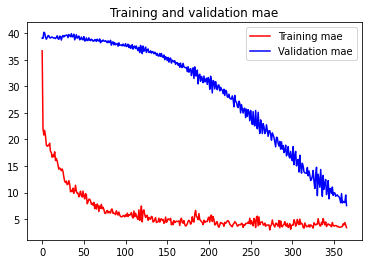

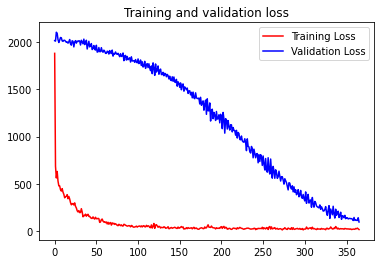

Score for fold 3: ['loss', 'mae'] of [99.47822570800781, 7.543362140655518]
------------------------------------------------------------------------
Training for fold 4 ...
Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 90, 90, 32)   320         input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_42 (MaxPooling2D) (None, 45, 45, 32)   0           conv2d_42[0][0]                  
__________________________________________________________________________________________________
batch_normali

Epoch 35/500
2/2 [==============================] - 0s 15ms/step - loss: 233.5711 - mae: 12.4108 - val_loss: 3067.3374 - val_mae: 51.7746
Epoch 36/500
2/2 [==============================] - 0s 15ms/step - loss: 220.7980 - mae: 11.8421 - val_loss: 2968.8740 - val_mae: 50.8656
Epoch 37/500
2/2 [==============================] - 0s 15ms/step - loss: 206.6434 - mae: 11.7444 - val_loss: 3001.8232 - val_mae: 51.1885
Epoch 38/500
2/2 [==============================] - 0s 14ms/step - loss: 204.4522 - mae: 11.1647 - val_loss: 3036.7732 - val_mae: 51.5262
Epoch 39/500
2/2 [==============================] - 0s 15ms/step - loss: 212.5428 - mae: 11.5497 - val_loss: 2980.2937 - val_mae: 51.0092
Epoch 40/500
2/2 [==============================] - 0s 15ms/step - loss: 190.8459 - mae: 11.7355 - val_loss: 2936.0178 - val_mae: 50.6030
Epoch 41/500
2/2 [==============================] - 0s 15ms/step - loss: 185.0078 - mae: 10.8226 - val_loss: 2974.3884 - val_mae: 50.9806
Epoch 42/500
2/2 [================

Epoch 95/500
2/2 [==============================] - 0s 15ms/step - loss: 56.3833 - mae: 5.8928 - val_loss: 2625.0029 - val_mae: 47.8773
Epoch 96/500
2/2 [==============================] - 0s 15ms/step - loss: 56.8411 - mae: 5.9887 - val_loss: 2686.1228 - val_mae: 48.4861
Epoch 97/500
2/2 [==============================] - 0s 15ms/step - loss: 61.9654 - mae: 5.9376 - val_loss: 2662.5603 - val_mae: 48.2693
Epoch 98/500
2/2 [==============================] - 0s 16ms/step - loss: 46.8064 - mae: 5.2223 - val_loss: 2623.7927 - val_mae: 47.9006
Epoch 99/500
2/2 [==============================] - 0s 15ms/step - loss: 58.7301 - mae: 5.9435 - val_loss: 2660.2390 - val_mae: 48.2596
Epoch 100/500
2/2 [==============================] - 0s 16ms/step - loss: 56.5281 - mae: 5.7756 - val_loss: 2645.6292 - val_mae: 48.1197
Epoch 101/500
2/2 [==============================] - 0s 15ms/step - loss: 66.3225 - mae: 6.4984 - val_loss: 2608.2239 - val_mae: 47.7550
Epoch 102/500
2/2 [===========================

Epoch 214/500
2/2 [==============================] - 0s 15ms/step - loss: 26.6393 - mae: 3.9047 - val_loss: 1474.7267 - val_mae: 35.7588
Epoch 215/500
2/2 [==============================] - 0s 15ms/step - loss: 39.6497 - mae: 4.8877 - val_loss: 1575.8979 - val_mae: 37.0701
Epoch 216/500
2/2 [==============================] - ETA: 0s - loss: 34.8107 - mae: 4.47 - 0s 15ms/step - loss: 33.8720 - mae: 4.3800 - val_loss: 1583.9415 - val_mae: 37.1637
Epoch 217/500
2/2 [==============================] - 0s 16ms/step - loss: 33.1284 - mae: 4.1781 - val_loss: 1476.4735 - val_mae: 35.7711
Epoch 218/500
2/2 [==============================] - 0s 16ms/step - loss: 37.3497 - mae: 4.3188 - val_loss: 1506.8199 - val_mae: 36.1905
Epoch 219/500
2/2 [==============================] - 0s 15ms/step - loss: 25.5067 - mae: 3.4882 - val_loss: 1511.3501 - val_mae: 36.2746
Epoch 220/500
2/2 [==============================] - 0s 15ms/step - loss: 30.8699 - mae: 3.9610 - val_loss: 1461.8230 - val_mae: 35.6423
Epo

2/2 [==============================] - 0s 15ms/step - loss: 30.7622 - mae: 4.1649 - val_loss: 325.6079 - val_mae: 16.1017
Epoch 334/500
2/2 [==============================] - 0s 15ms/step - loss: 29.2795 - mae: 3.8201 - val_loss: 261.0722 - val_mae: 14.2734
Epoch 335/500
2/2 [==============================] - 0s 15ms/step - loss: 27.4639 - mae: 4.0106 - val_loss: 322.0418 - val_mae: 15.9893
Epoch 336/500
2/2 [==============================] - 0s 15ms/step - loss: 34.9450 - mae: 4.2409 - val_loss: 283.6927 - val_mae: 14.9088
Epoch 337/500
2/2 [==============================] - 0s 15ms/step - loss: 33.7267 - mae: 4.2900 - val_loss: 195.3705 - val_mae: 11.9957
Epoch 338/500
2/2 [==============================] - 0s 15ms/step - loss: 48.0089 - mae: 4.8652 - val_loss: 318.9341 - val_mae: 15.8377
Epoch 339/500
2/2 [==============================] - 0s 15ms/step - loss: 38.8762 - mae: 4.4012 - val_loss: 286.1908 - val_mae: 14.9581
Epoch 340/500
2/2 [==============================] - 0s 15ms/s

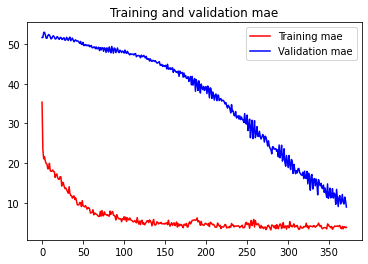

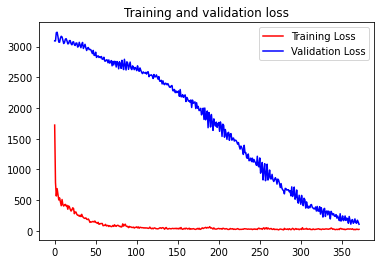

Score for fold 4: ['loss', 'mae'] of [108.3607177734375, 8.91640567779541]
------------------------------------------------------------------------
Training for fold 5 ...
Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 90, 90, 32)   320         input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_45 (MaxPooling2D) (None, 45, 45, 32)   0           conv2d_45[0][0]                  
__________________________________________________________________________________________________
batch_normaliz

Epoch 33/500
2/2 [==============================] - 0s 15ms/step - loss: 257.1605 - mae: 12.9311 - val_loss: 1828.5870 - val_mae: 38.1639
Epoch 34/500
2/2 [==============================] - 0s 15ms/step - loss: 230.8193 - mae: 12.5003 - val_loss: 1836.2050 - val_mae: 38.2722
Epoch 35/500
2/2 [==============================] - 0s 15ms/step - loss: 190.5878 - mae: 11.2045 - val_loss: 1802.5454 - val_mae: 37.8684
Epoch 36/500
2/2 [==============================] - 0s 16ms/step - loss: 195.3275 - mae: 11.6586 - val_loss: 1809.5499 - val_mae: 37.9714
Epoch 37/500
2/2 [==============================] - 0s 15ms/step - loss: 175.4736 - mae: 10.8613 - val_loss: 1839.7070 - val_mae: 38.3592
Epoch 38/500
2/2 [==============================] - 0s 15ms/step - loss: 202.9447 - mae: 11.2075 - val_loss: 1809.6776 - val_mae: 38.0006
Epoch 39/500
2/2 [==============================] - 0s 15ms/step - loss: 189.3154 - mae: 10.7806 - val_loss: 1791.2321 - val_mae: 37.7816
Epoch 40/500
2/2 [================

Epoch 152/500
2/2 [==============================] - 0s 15ms/step - loss: 37.7818 - mae: 4.9586 - val_loss: 1365.7609 - val_mae: 33.1605
Epoch 153/500
2/2 [==============================] - 0s 15ms/step - loss: 54.2481 - mae: 5.5202 - val_loss: 1355.8790 - val_mae: 33.0616
Epoch 154/500
2/2 [==============================] - 0s 15ms/step - loss: 35.8016 - mae: 4.5066 - val_loss: 1361.6104 - val_mae: 33.1755
Epoch 155/500
2/2 [==============================] - 0s 15ms/step - loss: 46.3265 - mae: 5.5015 - val_loss: 1375.2596 - val_mae: 33.3727
Epoch 156/500
2/2 [==============================] - 0s 15ms/step - loss: 27.2765 - mae: 4.0884 - val_loss: 1336.9562 - val_mae: 32.8313
Epoch 157/500
2/2 [==============================] - 0s 15ms/step - loss: 28.5423 - mae: 4.2137 - val_loss: 1354.7837 - val_mae: 33.0650
Epoch 158/500
2/2 [==============================] - 0s 15ms/step - loss: 33.9948 - mae: 4.4795 - val_loss: 1347.0479 - val_mae: 32.9400
Epoch 159/500
2/2 [======================

Epoch 270/500
2/2 [==============================] - 0s 14ms/step - loss: 31.1299 - mae: 4.0947 - val_loss: 503.9270 - val_mae: 19.6690
Epoch 271/500
2/2 [==============================] - 0s 13ms/step - loss: 23.2326 - mae: 3.6855 - val_loss: 480.9839 - val_mae: 19.1086
Epoch 272/500
2/2 [==============================] - 0s 13ms/step - loss: 26.5126 - mae: 3.8436 - val_loss: 431.8398 - val_mae: 17.7907
Epoch 273/500
2/2 [==============================] - 0s 13ms/step - loss: 23.2056 - mae: 3.8869 - val_loss: 475.4092 - val_mae: 18.9011
Epoch 274/500
2/2 [==============================] - 0s 14ms/step - loss: 13.8760 - mae: 2.8835 - val_loss: 463.9051 - val_mae: 18.5732
Epoch 275/500
2/2 [==============================] - 0s 14ms/step - loss: 26.9048 - mae: 3.5767 - val_loss: 418.9316 - val_mae: 17.3895
Epoch 276/500
2/2 [==============================] - 0s 14ms/step - loss: 30.4226 - mae: 4.3344 - val_loss: 387.8119 - val_mae: 16.6756
Epoch 277/500
2/2 [=============================

Epoch 330/500
2/2 [==============================] - 0s 14ms/step - loss: 32.3201 - mae: 4.3141 - val_loss: 175.8361 - val_mae: 10.9087
Epoch 331/500
2/2 [==============================] - 0s 13ms/step - loss: 26.5607 - mae: 3.4777 - val_loss: 158.1598 - val_mae: 10.0808
Epoch 332/500
2/2 [==============================] - 0s 14ms/step - loss: 27.4228 - mae: 3.8613 - val_loss: 152.4781 - val_mae: 9.7960
Epoch 333/500
2/2 [==============================] - 0s 14ms/step - loss: 32.9083 - mae: 4.1788 - val_loss: 168.0620 - val_mae: 10.3644
Epoch 334/500
2/2 [==============================] - 0s 14ms/step - loss: 25.6975 - mae: 3.6645 - val_loss: 166.2773 - val_mae: 10.3214
Epoch 335/500
2/2 [==============================] - 0s 14ms/step - loss: 27.2165 - mae: 3.8880 - val_loss: 181.1926 - val_mae: 10.9085
Epoch 336/500
2/2 [==============================] - 0s 14ms/step - loss: 31.6928 - mae: 3.9898 - val_loss: 138.2124 - val_mae: 9.3546
Epoch 337/500
2/2 [==============================]

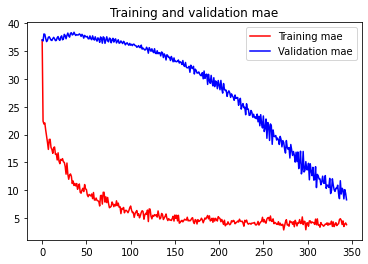

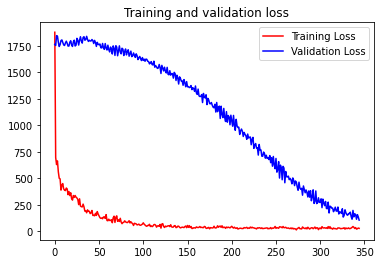

Score for fold 5: ['loss', 'mae'] of [106.3123779296875, 8.287766456604004]
------------------------------------------------------------------------
Training for fold 6 ...
Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 90, 90, 32)   320         input_11[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_48 (MaxPooling2D) (None, 45, 45, 32)   0           conv2d_48[0][0]                  
__________________________________________________________________________________________________
batch_normal

2/2 [==============================] - 0s 14ms/step - loss: 55.8046 - mae: 5.8805 - val_loss: 1493.5149 - val_mae: 33.9828
Epoch 93/500
2/2 [==============================] - 0s 15ms/step - loss: 70.0739 - mae: 6.4111 - val_loss: 1466.2198 - val_mae: 33.6164
Epoch 94/500
2/2 [==============================] - 0s 14ms/step - loss: 45.5319 - mae: 5.4597 - val_loss: 1467.8481 - val_mae: 33.6310
Epoch 95/500
2/2 [==============================] - 0s 14ms/step - loss: 61.2725 - mae: 5.9746 - val_loss: 1472.0771 - val_mae: 33.6849
Epoch 96/500
2/2 [==============================] - 0s 14ms/step - loss: 55.8314 - mae: 5.8755 - val_loss: 1439.5890 - val_mae: 33.2584
Epoch 97/500
2/2 [==============================] - 0s 14ms/step - loss: 67.1249 - mae: 6.3544 - val_loss: 1472.5454 - val_mae: 33.7124
Epoch 98/500
2/2 [==============================] - 0s 14ms/step - loss: 56.9859 - mae: 5.8299 - val_loss: 1470.6243 - val_mae: 33.6962
Epoch 99/500
2/2 [==============================] - ETA: 0s -

Epoch 151/500
2/2 [==============================] - 0s 14ms/step - loss: 43.3702 - mae: 5.1195 - val_loss: 1312.0721 - val_mae: 31.7654
Epoch 152/500
2/2 [==============================] - ETA: 0s - loss: 34.2968 - mae: 4.67 - 0s 14ms/step - loss: 35.0700 - mae: 4.8080 - val_loss: 1298.4314 - val_mae: 31.5812
Epoch 153/500
2/2 [==============================] - 0s 14ms/step - loss: 47.7343 - mae: 5.0340 - val_loss: 1257.7689 - val_mae: 31.0130
Epoch 154/500
2/2 [==============================] - 0s 14ms/step - loss: 35.4746 - mae: 4.7023 - val_loss: 1278.0052 - val_mae: 31.3108
Epoch 155/500
2/2 [==============================] - 0s 14ms/step - loss: 40.4493 - mae: 4.8577 - val_loss: 1294.5554 - val_mae: 31.5484
Epoch 156/500
2/2 [==============================] - 0s 14ms/step - loss: 25.7403 - mae: 4.2087 - val_loss: 1250.1605 - val_mae: 30.9010
Epoch 157/500
2/2 [==============================] - 0s 14ms/step - loss: 33.5873 - mae: 4.8547 - val_loss: 1272.4125 - val_mae: 31.2487
Epo

2/2 [==============================] - 0s 15ms/step - loss: 23.9779 - mae: 3.6933 - val_loss: 517.5981 - val_mae: 18.9759
Epoch 270/500
2/2 [==============================] - 0s 14ms/step - loss: 32.2121 - mae: 4.1788 - val_loss: 566.7598 - val_mae: 20.0158
Epoch 271/500
2/2 [==============================] - 0s 14ms/step - loss: 28.2788 - mae: 3.9034 - val_loss: 538.9074 - val_mae: 19.3429
Epoch 272/500
2/2 [==============================] - 0s 15ms/step - loss: 30.9057 - mae: 3.9858 - val_loss: 470.9449 - val_mae: 17.7018
Epoch 273/500
2/2 [==============================] - 0s 14ms/step - loss: 26.0355 - mae: 4.2351 - val_loss: 540.8754 - val_mae: 19.4431
Epoch 274/500
2/2 [==============================] - 0s 14ms/step - loss: 20.3216 - mae: 3.4251 - val_loss: 499.1749 - val_mae: 18.5621
Epoch 275/500
2/2 [==============================] - 0s 14ms/step - loss: 22.3354 - mae: 3.4272 - val_loss: 481.7798 - val_mae: 18.2235
Epoch 276/500
2/2 [==============================] - 0s 14ms/s

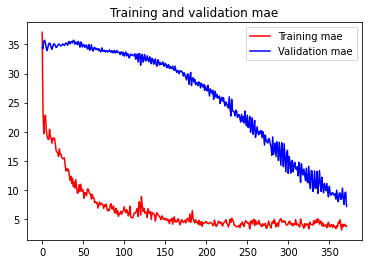

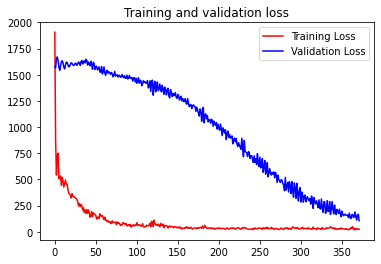

Score for fold 6: ['loss', 'mae'] of [104.98214721679688, 7.148373126983643]
------------------------------------------------------------------------
Training for fold 7 ...
Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 90, 90, 32)   320         input_13[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_51 (MaxPooling2D) (None, 45, 45, 32)   0           conv2d_51[0][0]                  
__________________________________________________________________________________________________
batch_norma

Epoch 91/500
2/2 [==============================] - 0s 14ms/step - loss: 73.6757 - mae: 6.9386 - val_loss: 1960.4070 - val_mae: 39.2221
Epoch 92/500
2/2 [==============================] - 0s 14ms/step - loss: 56.6698 - mae: 5.8470 - val_loss: 1937.3547 - val_mae: 38.9621
Epoch 93/500
2/2 [==============================] - 0s 14ms/step - loss: 68.2496 - mae: 6.7151 - val_loss: 1896.0103 - val_mae: 38.4847
Epoch 94/500
2/2 [==============================] - 0s 14ms/step - loss: 68.3136 - mae: 6.4618 - val_loss: 1947.0858 - val_mae: 39.0598
Epoch 95/500
2/2 [==============================] - 0s 14ms/step - loss: 76.9524 - mae: 6.9445 - val_loss: 1903.9833 - val_mae: 38.5750
Epoch 96/500
2/2 [==============================] - 0s 14ms/step - loss: 55.3000 - mae: 6.0882 - val_loss: 1879.4148 - val_mae: 38.3002
Epoch 97/500
2/2 [==============================] - 0s 15ms/step - loss: 76.3419 - mae: 7.0468 - val_loss: 1928.5148 - val_mae: 38.8717
Epoch 98/500
2/2 [==============================

Epoch 150/500
2/2 [==============================] - 0s 14ms/step - loss: 29.9363 - mae: 4.2522 - val_loss: 1612.4995 - val_mae: 35.4528
Epoch 151/500
2/2 [==============================] - ETA: 0s - loss: 47.6718 - mae: 5.79 - 0s 14ms/step - loss: 44.2258 - mae: 5.3530 - val_loss: 1612.6360 - val_mae: 35.4636
Epoch 152/500
2/2 [==============================] - 0s 14ms/step - loss: 42.9511 - mae: 5.0640 - val_loss: 1623.4497 - val_mae: 35.6165
Epoch 153/500
2/2 [==============================] - 0s 14ms/step - loss: 32.9068 - mae: 4.5587 - val_loss: 1547.3341 - val_mae: 34.6863
Epoch 154/500
2/2 [==============================] - 0s 15ms/step - loss: 39.0138 - mae: 4.9142 - val_loss: 1616.1782 - val_mae: 35.6174
Epoch 155/500
2/2 [==============================] - ETA: 0s - loss: 56.1580 - mae: 5.41 - 0s 15ms/step - loss: 44.6215 - mae: 4.8173 - val_loss: 1583.0571 - val_mae: 35.2453
Epoch 156/500
2/2 [==============================] - 0s 14ms/step - loss: 24.4344 - mae: 3.8517 - val_

Epoch 209/500
2/2 [==============================] - 0s 14ms/step - loss: 23.5359 - mae: 3.6418 - val_loss: 1176.1804 - val_mae: 30.2116
Epoch 210/500
2/2 [==============================] - 0s 15ms/step - loss: 32.7705 - mae: 3.9949 - val_loss: 1050.4379 - val_mae: 28.2643
Epoch 211/500
2/2 [==============================] - 0s 16ms/step - loss: 30.1374 - mae: 4.2923 - val_loss: 1099.9913 - val_mae: 29.1288
Epoch 212/500
2/2 [==============================] - 0s 14ms/step - loss: 31.6553 - mae: 4.2831 - val_loss: 1107.9395 - val_mae: 29.2758
Epoch 213/500
2/2 [==============================] - 0s 21ms/step - loss: 21.7760 - mae: 3.4690 - val_loss: 1039.3048 - val_mae: 28.1795
Epoch 214/500
2/2 [==============================] - 0s 17ms/step - loss: 35.1707 - mae: 4.4642 - val_loss: 1077.5184 - val_mae: 28.7909
Epoch 215/500
2/2 [==============================] - 0s 15ms/step - loss: 28.8518 - mae: 3.9385 - val_loss: 1044.7749 - val_mae: 28.2410
Epoch 216/500
2/2 [======================

2/2 [==============================] - 0s 15ms/step - loss: 26.8142 - mae: 4.1343 - val_loss: 253.4085 - val_mae: 12.9937
Epoch 330/500
2/2 [==============================] - 0s 15ms/step - loss: 34.1167 - mae: 4.4996 - val_loss: 191.5200 - val_mae: 11.0844
Epoch 331/500
2/2 [==============================] - 0s 16ms/step - loss: 27.6112 - mae: 3.7225 - val_loss: 142.6460 - val_mae: 9.4666
Epoch 332/500
2/2 [==============================] - 0s 15ms/step - loss: 24.1947 - mae: 3.6594 - val_loss: 191.1345 - val_mae: 11.1108
Epoch 333/500
2/2 [==============================] - 0s 15ms/step - loss: 23.0484 - mae: 3.4956 - val_loss: 191.4892 - val_mae: 11.1301
Epoch 334/500
2/2 [==============================] - 0s 15ms/step - loss: 31.6892 - mae: 3.8664 - val_loss: 131.7692 - val_mae: 9.0998
Epoch 335/500
2/2 [==============================] - 0s 15ms/step - loss: 29.5459 - mae: 4.0943 - val_loss: 150.8036 - val_mae: 9.8583
Epoch 336/500
2/2 [==============================] - 0s 16ms/step

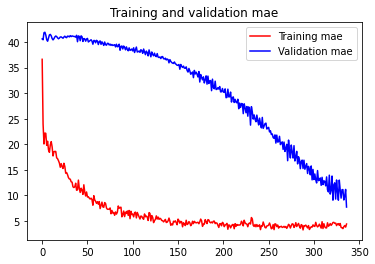

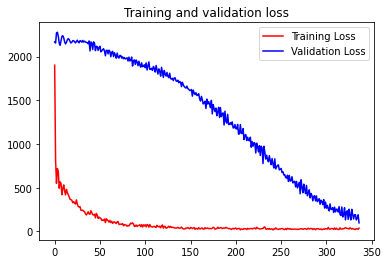

Score for fold 7: ['loss', 'mae'] of [98.18840026855469, 7.714621067047119]
------------------------------------------------------------------------
Training for fold 8 ...
Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_54 (Conv2D)              (None, 90, 90, 32)   320         input_15[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_54 (MaxPooling2D) (None, 45, 45, 32)   0           conv2d_54[0][0]                  
__________________________________________________________________________________________________
batch_normal

Epoch 35/500
2/2 [==============================] - 0s 15ms/step - loss: 216.6002 - mae: 12.0227 - val_loss: 2317.5422 - val_mae: 41.7877
Epoch 36/500
2/2 [==============================] - 0s 15ms/step - loss: 188.1877 - mae: 11.5076 - val_loss: 2327.1980 - val_mae: 41.9063
Epoch 37/500
2/2 [==============================] - 0s 15ms/step - loss: 180.8303 - mae: 11.2158 - val_loss: 2346.4102 - val_mae: 42.1208
Epoch 38/500
2/2 [==============================] - 0s 15ms/step - loss: 192.2271 - mae: 11.3082 - val_loss: 2296.5227 - val_mae: 41.6060
Epoch 39/500
2/2 [==============================] - 0s 15ms/step - loss: 169.9598 - mae: 10.4401 - val_loss: 2341.2500 - val_mae: 42.0969
Epoch 40/500
2/2 [==============================] - 0s 15ms/step - loss: 198.1253 - mae: 11.2443 - val_loss: 2327.1553 - val_mae: 41.9634
Epoch 41/500
2/2 [==============================] - 0s 15ms/step - loss: 151.6310 - mae: 9.9295 - val_loss: 2258.6912 - val_mae: 41.2310
Epoch 42/500
2/2 [=================

Epoch 95/500
2/2 [==============================] - 0s 16ms/step - loss: 61.9528 - mae: 6.2985 - val_loss: 2095.6335 - val_mae: 39.6861
Epoch 96/500
2/2 [==============================] - 0s 15ms/step - loss: 44.3124 - mae: 5.4727 - val_loss: 2073.1353 - val_mae: 39.4548
Epoch 97/500
2/2 [==============================] - 0s 15ms/step - loss: 63.6682 - mae: 6.5300 - val_loss: 2104.6670 - val_mae: 39.8223
Epoch 98/500
2/2 [==============================] - 0s 15ms/step - loss: 66.6357 - mae: 5.8381 - val_loss: 2071.9961 - val_mae: 39.4819
Epoch 99/500
2/2 [==============================] - 0s 15ms/step - loss: 65.8896 - mae: 6.3559 - val_loss: 2047.9258 - val_mae: 39.2234
Epoch 100/500
2/2 [==============================] - 0s 16ms/step - loss: 55.9058 - mae: 6.0867 - val_loss: 2088.5693 - val_mae: 39.6846
Epoch 101/500
2/2 [==============================] - 0s 16ms/step - loss: 61.9822 - mae: 6.2217 - val_loss: 2065.0488 - val_mae: 39.4293
Epoch 102/500
2/2 [===========================

Epoch 155/500
2/2 [==============================] - 0s 15ms/step - loss: 39.2739 - mae: 4.6678 - val_loss: 1754.2734 - val_mae: 36.3548
Epoch 156/500
2/2 [==============================] - 0s 15ms/step - loss: 24.3616 - mae: 3.8133 - val_loss: 1767.6534 - val_mae: 36.5206
Epoch 157/500
2/2 [==============================] - 0s 15ms/step - loss: 31.0205 - mae: 4.3633 - val_loss: 1708.0511 - val_mae: 35.8052
Epoch 158/500
2/2 [==============================] - 0s 15ms/step - loss: 34.3554 - mae: 4.5482 - val_loss: 1793.1863 - val_mae: 36.8043
Epoch 159/500
2/2 [==============================] - 0s 15ms/step - loss: 28.8809 - mae: 4.2565 - val_loss: 1734.1140 - val_mae: 36.0948
Epoch 160/500
2/2 [==============================] - 0s 15ms/step - loss: 34.1740 - mae: 4.5896 - val_loss: 1743.9901 - val_mae: 36.2089
Epoch 161/500
2/2 [==============================] - 0s 15ms/step - loss: 32.1656 - mae: 4.2290 - val_loss: 1728.3429 - val_mae: 36.0248
Epoch 162/500
2/2 [======================

2/2 [==============================] - 0s 16ms/step - loss: 21.8423 - mae: 3.4189 - val_loss: 718.8373 - val_mae: 22.5498
Epoch 275/500
2/2 [==============================] - 0s 15ms/step - loss: 22.2065 - mae: 3.4663 - val_loss: 592.5733 - val_mae: 19.7557
Epoch 276/500
2/2 [==============================] - 0s 14ms/step - loss: 29.1117 - mae: 4.4342 - val_loss: 634.6809 - val_mae: 20.7318
Epoch 277/500
2/2 [==============================] - 0s 15ms/step - loss: 33.2982 - mae: 4.5406 - val_loss: 690.2538 - val_mae: 22.0159
Epoch 278/500
2/2 [==============================] - 0s 15ms/step - loss: 31.0136 - mae: 4.1745 - val_loss: 549.1763 - val_mae: 19.0352
Epoch 279/500
2/2 [==============================] - 0s 15ms/step - loss: 29.3842 - mae: 4.2186 - val_loss: 635.8300 - val_mae: 21.0987
Epoch 280/500
2/2 [==============================] - 0s 16ms/step - loss: 25.5403 - mae: 3.7368 - val_loss: 619.4120 - val_mae: 20.7831
Epoch 281/500
2/2 [==============================] - 0s 14ms/s

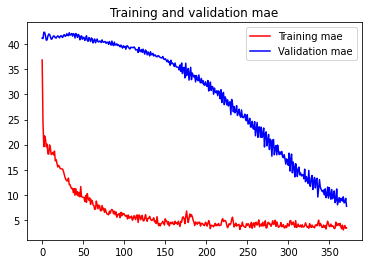

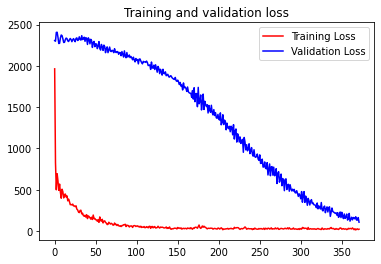

Score for fold 8: ['loss', 'mae'] of [107.94324493408203, 7.732600212097168]
------------------------------------------------------------------------
Training for fold 9 ...
Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 90, 90, 32)   320         input_17[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_57 (MaxPooling2D) (None, 45, 45, 32)   0           conv2d_57[0][0]                  
__________________________________________________________________________________________________
batch_norma

Epoch 35/500
2/2 [==============================] - 0s 15ms/step - loss: 222.1993 - mae: 11.6873 - val_loss: 1863.5015 - val_mae: 35.6672
Epoch 36/500
2/2 [==============================] - 0s 15ms/step - loss: 202.3534 - mae: 11.7801 - val_loss: 1842.3171 - val_mae: 35.4112
Epoch 37/500
2/2 [==============================] - 0s 15ms/step - loss: 222.6716 - mae: 11.9049 - val_loss: 1883.2778 - val_mae: 35.9427
Epoch 38/500
2/2 [==============================] - 0s 15ms/step - loss: 178.0829 - mae: 10.6044 - val_loss: 1843.8954 - val_mae: 35.4597
Epoch 39/500
2/2 [==============================] - 0s 15ms/step - loss: 184.0620 - mae: 11.2931 - val_loss: 1853.6218 - val_mae: 35.5952
Epoch 40/500
2/2 [==============================] - 0s 15ms/step - loss: 185.0297 - mae: 11.0059 - val_loss: 1880.2784 - val_mae: 35.9364
Epoch 41/500
2/2 [==============================] - 0s 15ms/step - loss: 184.2191 - mae: 10.1357 - val_loss: 1838.4211 - val_mae: 35.4318
Epoch 42/500
2/2 [================

Epoch 95/500
2/2 [==============================] - 0s 15ms/step - loss: 50.4986 - mae: 5.5199 - val_loss: 1675.2391 - val_mae: 33.7650
Epoch 96/500
2/2 [==============================] - 0s 15ms/step - loss: 47.8566 - mae: 5.6088 - val_loss: 1663.7336 - val_mae: 33.6440
Epoch 97/500
2/2 [==============================] - 0s 15ms/step - loss: 59.6107 - mae: 6.3651 - val_loss: 1688.0765 - val_mae: 33.9692
Epoch 98/500
2/2 [==============================] - 0s 15ms/step - loss: 49.2699 - mae: 5.3965 - val_loss: 1648.4250 - val_mae: 33.4614
Epoch 99/500
2/2 [==============================] - 0s 15ms/step - loss: 61.0294 - mae: 6.0172 - val_loss: 1660.8690 - val_mae: 33.6315
Epoch 100/500
2/2 [==============================] - 0s 15ms/step - loss: 47.3735 - mae: 5.7059 - val_loss: 1666.3370 - val_mae: 33.7079
Epoch 101/500
2/2 [==============================] - 0s 15ms/step - loss: 67.1427 - mae: 6.4186 - val_loss: 1654.7452 - val_mae: 33.5673
Epoch 102/500
2/2 [===========================

Epoch 155/500
2/2 [==============================] - 0s 15ms/step - loss: 38.9789 - mae: 4.9129 - val_loss: 1415.0411 - val_mae: 30.9427
Epoch 156/500
2/2 [==============================] - 0s 15ms/step - loss: 31.6904 - mae: 4.3593 - val_loss: 1389.8019 - val_mae: 30.5910
Epoch 157/500
2/2 [==============================] - 0s 15ms/step - loss: 25.9176 - mae: 4.1819 - val_loss: 1350.7042 - val_mae: 30.0149
Epoch 158/500
2/2 [==============================] - 0s 15ms/step - loss: 42.0234 - mae: 5.3181 - val_loss: 1412.5026 - val_mae: 30.9197
Epoch 159/500
2/2 [==============================] - 0s 15ms/step - loss: 36.0041 - mae: 4.4386 - val_loss: 1336.6118 - val_mae: 29.7784
Epoch 160/500
2/2 [==============================] - 0s 15ms/step - loss: 28.5440 - mae: 4.3993 - val_loss: 1397.7023 - val_mae: 30.6826
Epoch 161/500
2/2 [==============================] - 0s 15ms/step - loss: 49.2242 - mae: 5.1137 - val_loss: 1358.6067 - val_mae: 30.1110
Epoch 162/500
2/2 [======================

Epoch 215/500
2/2 [==============================] - 0s 15ms/step - loss: 31.3008 - mae: 4.2042 - val_loss: 953.1154 - val_mae: 24.5305
Epoch 216/500
2/2 [==============================] - 0s 15ms/step - loss: 27.6955 - mae: 4.0898 - val_loss: 982.7582 - val_mae: 25.0711
Epoch 217/500
2/2 [==============================] - 0s 16ms/step - loss: 26.8204 - mae: 3.7572 - val_loss: 957.5408 - val_mae: 24.6373
Epoch 218/500
2/2 [==============================] - 0s 15ms/step - loss: 24.4229 - mae: 3.7916 - val_loss: 905.5649 - val_mae: 23.7216
Epoch 219/500
2/2 [==============================] - 0s 16ms/step - loss: 24.9064 - mae: 3.9380 - val_loss: 974.5302 - val_mae: 25.1365
Epoch 220/500
2/2 [==============================] - 0s 15ms/step - loss: 40.8253 - mae: 4.6539 - val_loss: 879.1884 - val_mae: 23.3981
Epoch 221/500
2/2 [==============================] - 0s 15ms/step - loss: 24.2991 - mae: 4.0244 - val_loss: 927.3865 - val_mae: 24.3715
Epoch 222/500
2/2 [=============================

2/2 [==============================] - 0s 15ms/step - loss: 26.2361 - mae: 3.7192 - val_loss: 207.9924 - val_mae: 9.4831
Epoch 336/500
2/2 [==============================] - 0s 15ms/step - loss: 23.9610 - mae: 3.5237 - val_loss: 199.1256 - val_mae: 9.2778
Epoch 337/500
2/2 [==============================] - 0s 15ms/step - loss: 34.9124 - mae: 4.2789 - val_loss: 165.4921 - val_mae: 8.3233
Epoch 338/500
2/2 [==============================] - 0s 15ms/step - loss: 40.3059 - mae: 4.4659 - val_loss: 193.4607 - val_mae: 9.1405
Epoch 339/500
2/2 [==============================] - 0s 15ms/step - loss: 32.1831 - mae: 4.0257 - val_loss: 194.4297 - val_mae: 9.1891
Epoch 340/500
2/2 [==============================] - 0s 15ms/step - loss: 25.9291 - mae: 3.8135 - val_loss: 192.7798 - val_mae: 9.0712
Epoch 341/500
2/2 [==============================] - 0s 15ms/step - loss: 34.5878 - mae: 4.4036 - val_loss: 183.1847 - val_mae: 8.8945
Epoch 342/500
2/2 [==============================] - 0s 15ms/step - l

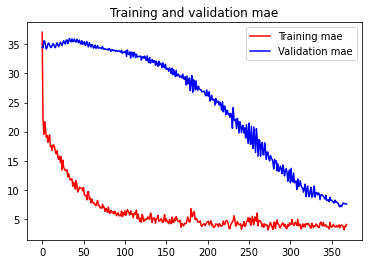

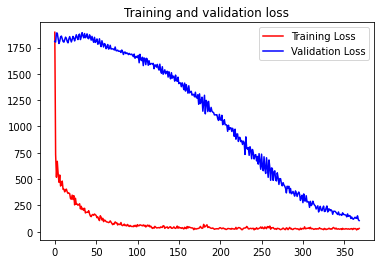

Score for fold 9: ['loss', 'mae'] of [105.5257568359375, 7.545677661895752]
------------------------------------------------------------------------
Training for fold 10 ...
Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 90, 90, 32)   320         input_19[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_60 (MaxPooling2D) (None, 45, 45, 32)   0           conv2d_60[0][0]                  
__________________________________________________________________________________________________
batch_norma

Epoch 94/500
2/2 [==============================] - 0s 15ms/step - loss: 78.6387 - mae: 6.5653 - val_loss: 1486.2228 - val_mae: 33.6229
Epoch 95/500
2/2 [==============================] - 0s 15ms/step - loss: 73.5907 - mae: 6.6679 - val_loss: 1448.0474 - val_mae: 33.1251
Epoch 96/500
2/2 [==============================] - 0s 16ms/step - loss: 66.0589 - mae: 6.5986 - val_loss: 1473.8571 - val_mae: 33.4553
Epoch 97/500
2/2 [==============================] - 0s 14ms/step - loss: 78.3754 - mae: 6.5352 - val_loss: 1497.3812 - val_mae: 33.7468
Epoch 98/500
2/2 [==============================] - 0s 15ms/step - loss: 68.3894 - mae: 6.5599 - val_loss: 1438.6566 - val_mae: 33.0039
Epoch 99/500
2/2 [==============================] - 0s 15ms/step - loss: 83.2028 - mae: 7.3624 - val_loss: 1455.2754 - val_mae: 33.2358
Epoch 100/500
2/2 [==============================] - 0s 14ms/step - loss: 59.4176 - mae: 6.1396 - val_loss: 1480.6614 - val_mae: 33.5731
Epoch 101/500
2/2 [============================

Epoch 154/500
2/2 [==============================] - 0s 15ms/step - loss: 38.6204 - mae: 4.7457 - val_loss: 1248.4039 - val_mae: 30.7942
Epoch 155/500
2/2 [==============================] - 0s 15ms/step - loss: 42.5372 - mae: 4.9054 - val_loss: 1254.1820 - val_mae: 30.8754
Epoch 156/500
2/2 [==============================] - 0s 15ms/step - loss: 25.1238 - mae: 3.9358 - val_loss: 1213.3505 - val_mae: 30.2670
Epoch 157/500
2/2 [==============================] - 0s 15ms/step - loss: 35.9591 - mae: 4.5755 - val_loss: 1226.4348 - val_mae: 30.4450
Epoch 158/500
2/2 [==============================] - 0s 15ms/step - loss: 32.4954 - mae: 4.3776 - val_loss: 1220.8945 - val_mae: 30.3495
Epoch 159/500
2/2 [==============================] - 0s 15ms/step - loss: 24.2173 - mae: 3.9591 - val_loss: 1185.7340 - val_mae: 29.8240
Epoch 160/500
2/2 [==============================] - 0s 15ms/step - loss: 37.7614 - mae: 4.9625 - val_loss: 1219.4005 - val_mae: 30.3416
Epoch 161/500
2/2 [======================

2/2 [==============================] - 0s 15ms/step - loss: 29.6242 - mae: 4.3186 - val_loss: 491.2580 - val_mae: 18.6995
Epoch 274/500
2/2 [==============================] - 0s 14ms/step - loss: 21.0750 - mae: 3.4958 - val_loss: 502.5490 - val_mae: 18.9964
Epoch 275/500
2/2 [==============================] - 0s 15ms/step - loss: 27.0006 - mae: 3.7354 - val_loss: 448.3057 - val_mae: 17.9124
Epoch 276/500
2/2 [==============================] - 0s 15ms/step - loss: 26.5859 - mae: 3.6611 - val_loss: 426.0491 - val_mae: 17.4314
Epoch 277/500
2/2 [==============================] - 0s 14ms/step - loss: 32.6626 - mae: 4.5215 - val_loss: 491.2899 - val_mae: 18.7877
Epoch 278/500
2/2 [==============================] - 0s 15ms/step - loss: 27.1209 - mae: 3.9912 - val_loss: 445.4410 - val_mae: 17.8226
Epoch 279/500
2/2 [==============================] - 0s 15ms/step - loss: 26.7317 - mae: 3.8988 - val_loss: 421.0480 - val_mae: 17.2795
Epoch 280/500
2/2 [==============================] - 0s 15ms/s

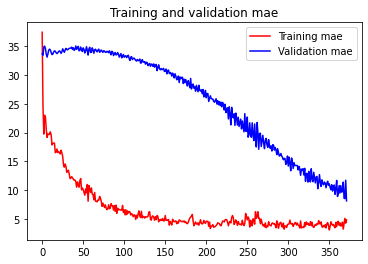

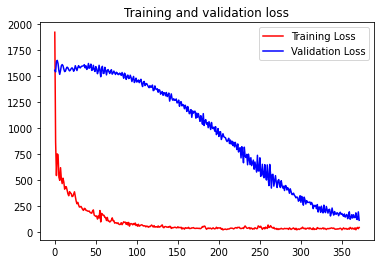

Score for fold 10: ['loss', 'mae'] of [109.5755386352539, 8.149842262268066]
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 166.87513732910156 - MAE: 10.72644329071045
------------------------------------------------------------------------
> Fold 2 - Loss: 106.146240234375 - MAE: 8.350674629211426
------------------------------------------------------------------------
> Fold 3 - Loss: 99.47822570800781 - MAE: 7.543362140655518
------------------------------------------------------------------------
> Fold 4 - Loss: 108.3607177734375 - MAE: 8.91640567779541
------------------------------------------------------------------------
> Fold 5 - Loss: 106.3123779296875 - MAE: 8.287766456604004
------------------------------------------------------------------------
> Fold 6 - Loss: 104.98214721679688 - MAE: 7.148373126983643
-------------------------------------

In [31]:
from sklearn.model_selection import StratifiedKFold , KFold ,RepeatedKFold

kfold = KFold(n_splits=10,shuffle=True,random_state=42)
mae_per_fold = []
loss_per_fold = []
n_epochs = []

# Variable for keeping count of split we are executing
fold_no = 1

# K-fold Train and test for each split
for train,test in list(kfold.split(train_data,Y)):

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    all_model = build_model2(1, activation='relu', loss='mean_squared_error')
    all_model.summary()
    all_history = all_model.fit(
        [train_data[train],X[train]], Y[train],
        validation_data = ([train_data[test],X[test]], Y[test]),
        callbacks=[callback],
        batch_size=64,
        epochs=500,
        verbose=1
    )
    
    %matplotlib inline
    mae = all_history.history['mae']
    val_mae = all_history.history['val_mae']
    loss = all_history.history['loss']
    val_loss = all_history.history['val_loss']

    epochs = range(len(mae))

    plt.plot(epochs, mae, 'r', label='Training mae')
    plt.plot(epochs, val_mae, 'b', label='Validation mae')
    plt.title('Training and validation mae')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
    # Generate generalization metrics
    scores = all_model.evaluate([train_data[test],X[test]], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {all_model.metrics_names} of {scores}')
    mae_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])
    n_epochs.append(len(mae))

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(mae_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - MAE: {mae_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> MAE: {np.mean(mae_per_fold)} (+- {np.std(mae_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Epochs: {np.mean(n_epochs)}')
print('------------------------------------------------------------------------')

In [32]:
all_model = build_model2(1, activation='relu', loss='mean_squared_error')
all_model.summary()
all_history = all_model.fit(
    [train_data,X],
    Y,
    batch_size=64,
    epochs=int(math.ceil(np.mean(n_epochs))),
    verbose=1
)

Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 90, 90, 32)   320         input_21[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_63 (MaxPooling2D) (None, 45, 45, 32)   0           conv2d_63[0][0]                  
__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, 45, 45, 32)   128         max_pooling2d_63[0][0]           
______________________________________________________________________________________

2/2 [==============================] - 0s 15ms/step - loss: 41.7944 - mae: 4.9783
Epoch 134/379
2/2 [==============================] - 0s 15ms/step - loss: 32.3442 - mae: 4.4791
Epoch 135/379
2/2 [==============================] - 0s 15ms/step - loss: 41.2852 - mae: 4.7724
Epoch 136/379
2/2 [==============================] - 0s 15ms/step - loss: 41.8382 - mae: 4.9881
Epoch 137/379
2/2 [==============================] - 0s 15ms/step - loss: 41.2764 - mae: 5.0243
Epoch 138/379
2/2 [==============================] - 0s 15ms/step - loss: 44.8062 - mae: 5.1256
Epoch 139/379
2/2 [==============================] - 0s 15ms/step - loss: 33.6777 - mae: 4.5475
Epoch 140/379
2/2 [==============================] - 0s 15ms/step - loss: 40.7408 - mae: 4.8850
Epoch 141/379
2/2 [==============================] - 0s 15ms/step - loss: 44.8415 - mae: 5.1785
Epoch 142/379
2/2 [==============================] - 0s 15ms/step - loss: 36.1347 - mae: 4.4403
Epoch 143/379
2/2 [==============================] - 0

2/2 [==============================] - 0s 15ms/step - loss: 38.5435 - mae: 4.8752
Epoch 304/379
2/2 [==============================] - 0s 15ms/step - loss: 29.0648 - mae: 3.9552
Epoch 305/379
2/2 [==============================] - 0s 15ms/step - loss: 25.3388 - mae: 3.7546
Epoch 306/379
2/2 [==============================] - 0s 15ms/step - loss: 27.4935 - mae: 4.0187
Epoch 307/379
2/2 [==============================] - 0s 16ms/step - loss: 24.7150 - mae: 3.6266
Epoch 308/379
2/2 [==============================] - 0s 15ms/step - loss: 27.9957 - mae: 4.0493
Epoch 309/379
2/2 [==============================] - 0s 15ms/step - loss: 28.2904 - mae: 3.8358
Epoch 310/379
2/2 [==============================] - 0s 15ms/step - loss: 26.9061 - mae: 3.8668
Epoch 311/379
2/2 [==============================] - 0s 15ms/step - loss: 35.8220 - mae: 4.1777
Epoch 312/379
2/2 [==============================] - 0s 15ms/step - loss: 25.4028 - mae: 3.9373
Epoch 313/379
2/2 [==============================] - 0

In [33]:
test_data = test_data.reshape(test_data.shape[0],90,90,1)

In [34]:
pred2=all_model.predict([test_data, Xtest])
print(pred2)

[[25.828878]
 [22.047403]
 [21.590162]
 [24.300264]
 [22.992346]
 [24.924522]
 [51.646683]
 [39.75423 ]
 [50.92533 ]
 [62.59654 ]
 [59.000267]
 [65.93222 ]
 [65.95876 ]
 [61.370678]
 [15.651932]
 [15.69313 ]
 [18.80466 ]
 [35.051586]
 [19.25316 ]
 [22.738714]
 [48.65449 ]
 [60.42639 ]
 [50.219322]
 [66.1459  ]
 [46.057705]
 [57.928986]
 [51.202847]
 [58.242157]]


#### Writte predictions to file

In [35]:
import csv

header = ['id', 'age']

with open('example_submission.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    writer.writerow(header)
    
    i=0
    for p in pred2:
        writer.writerow([i+1, pred2[i][0]])
        i = i+1
        
    
    

### Feature Importance - SHAP (using model without sex and education)

In [36]:
shap.initjs()

In [37]:
background = train_data[np.random.choice(train_data.shape[0], 100, replace=False)]
shap.explainers._deep.deep_tf.op_handlers["FusedBatchNormV3"] = shap.explainers._deep.deep_tf.passthrough
explainer = shap.DeepExplainer(age_model, background)

shap_values = explainer.shap_values(test_data)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


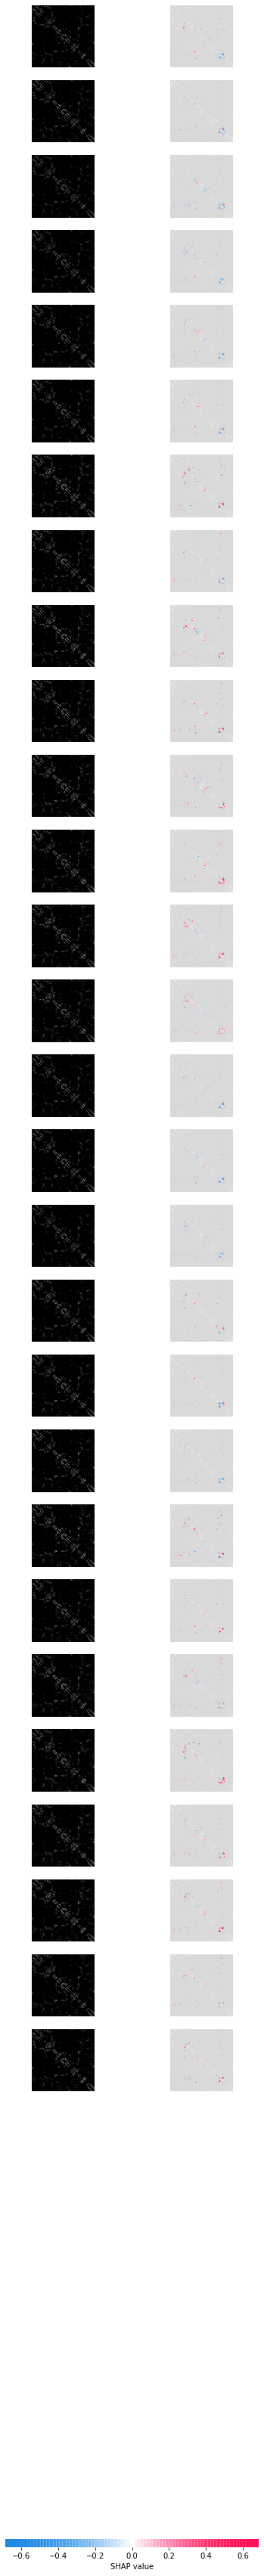

In [38]:
shap.image_plot(shap_values, test_data)

### Results visualization

In [39]:
idx = np.random.choice(np.arange(len(Y)), 10, replace=False)
x_sample = train_data[idx]
xmore_sample = X[idx]
y_sample = Y[idx]
predSample=all_model.predict([x_sample,xmore_sample])
print(predSample)

[[22.681343]
 [12.650882]
 [65.85193 ]
 [69.11162 ]
 [14.188963]
 [34.96559 ]
 [48.932537]
 [14.687266]
 [19.49246 ]
 [21.739975]]


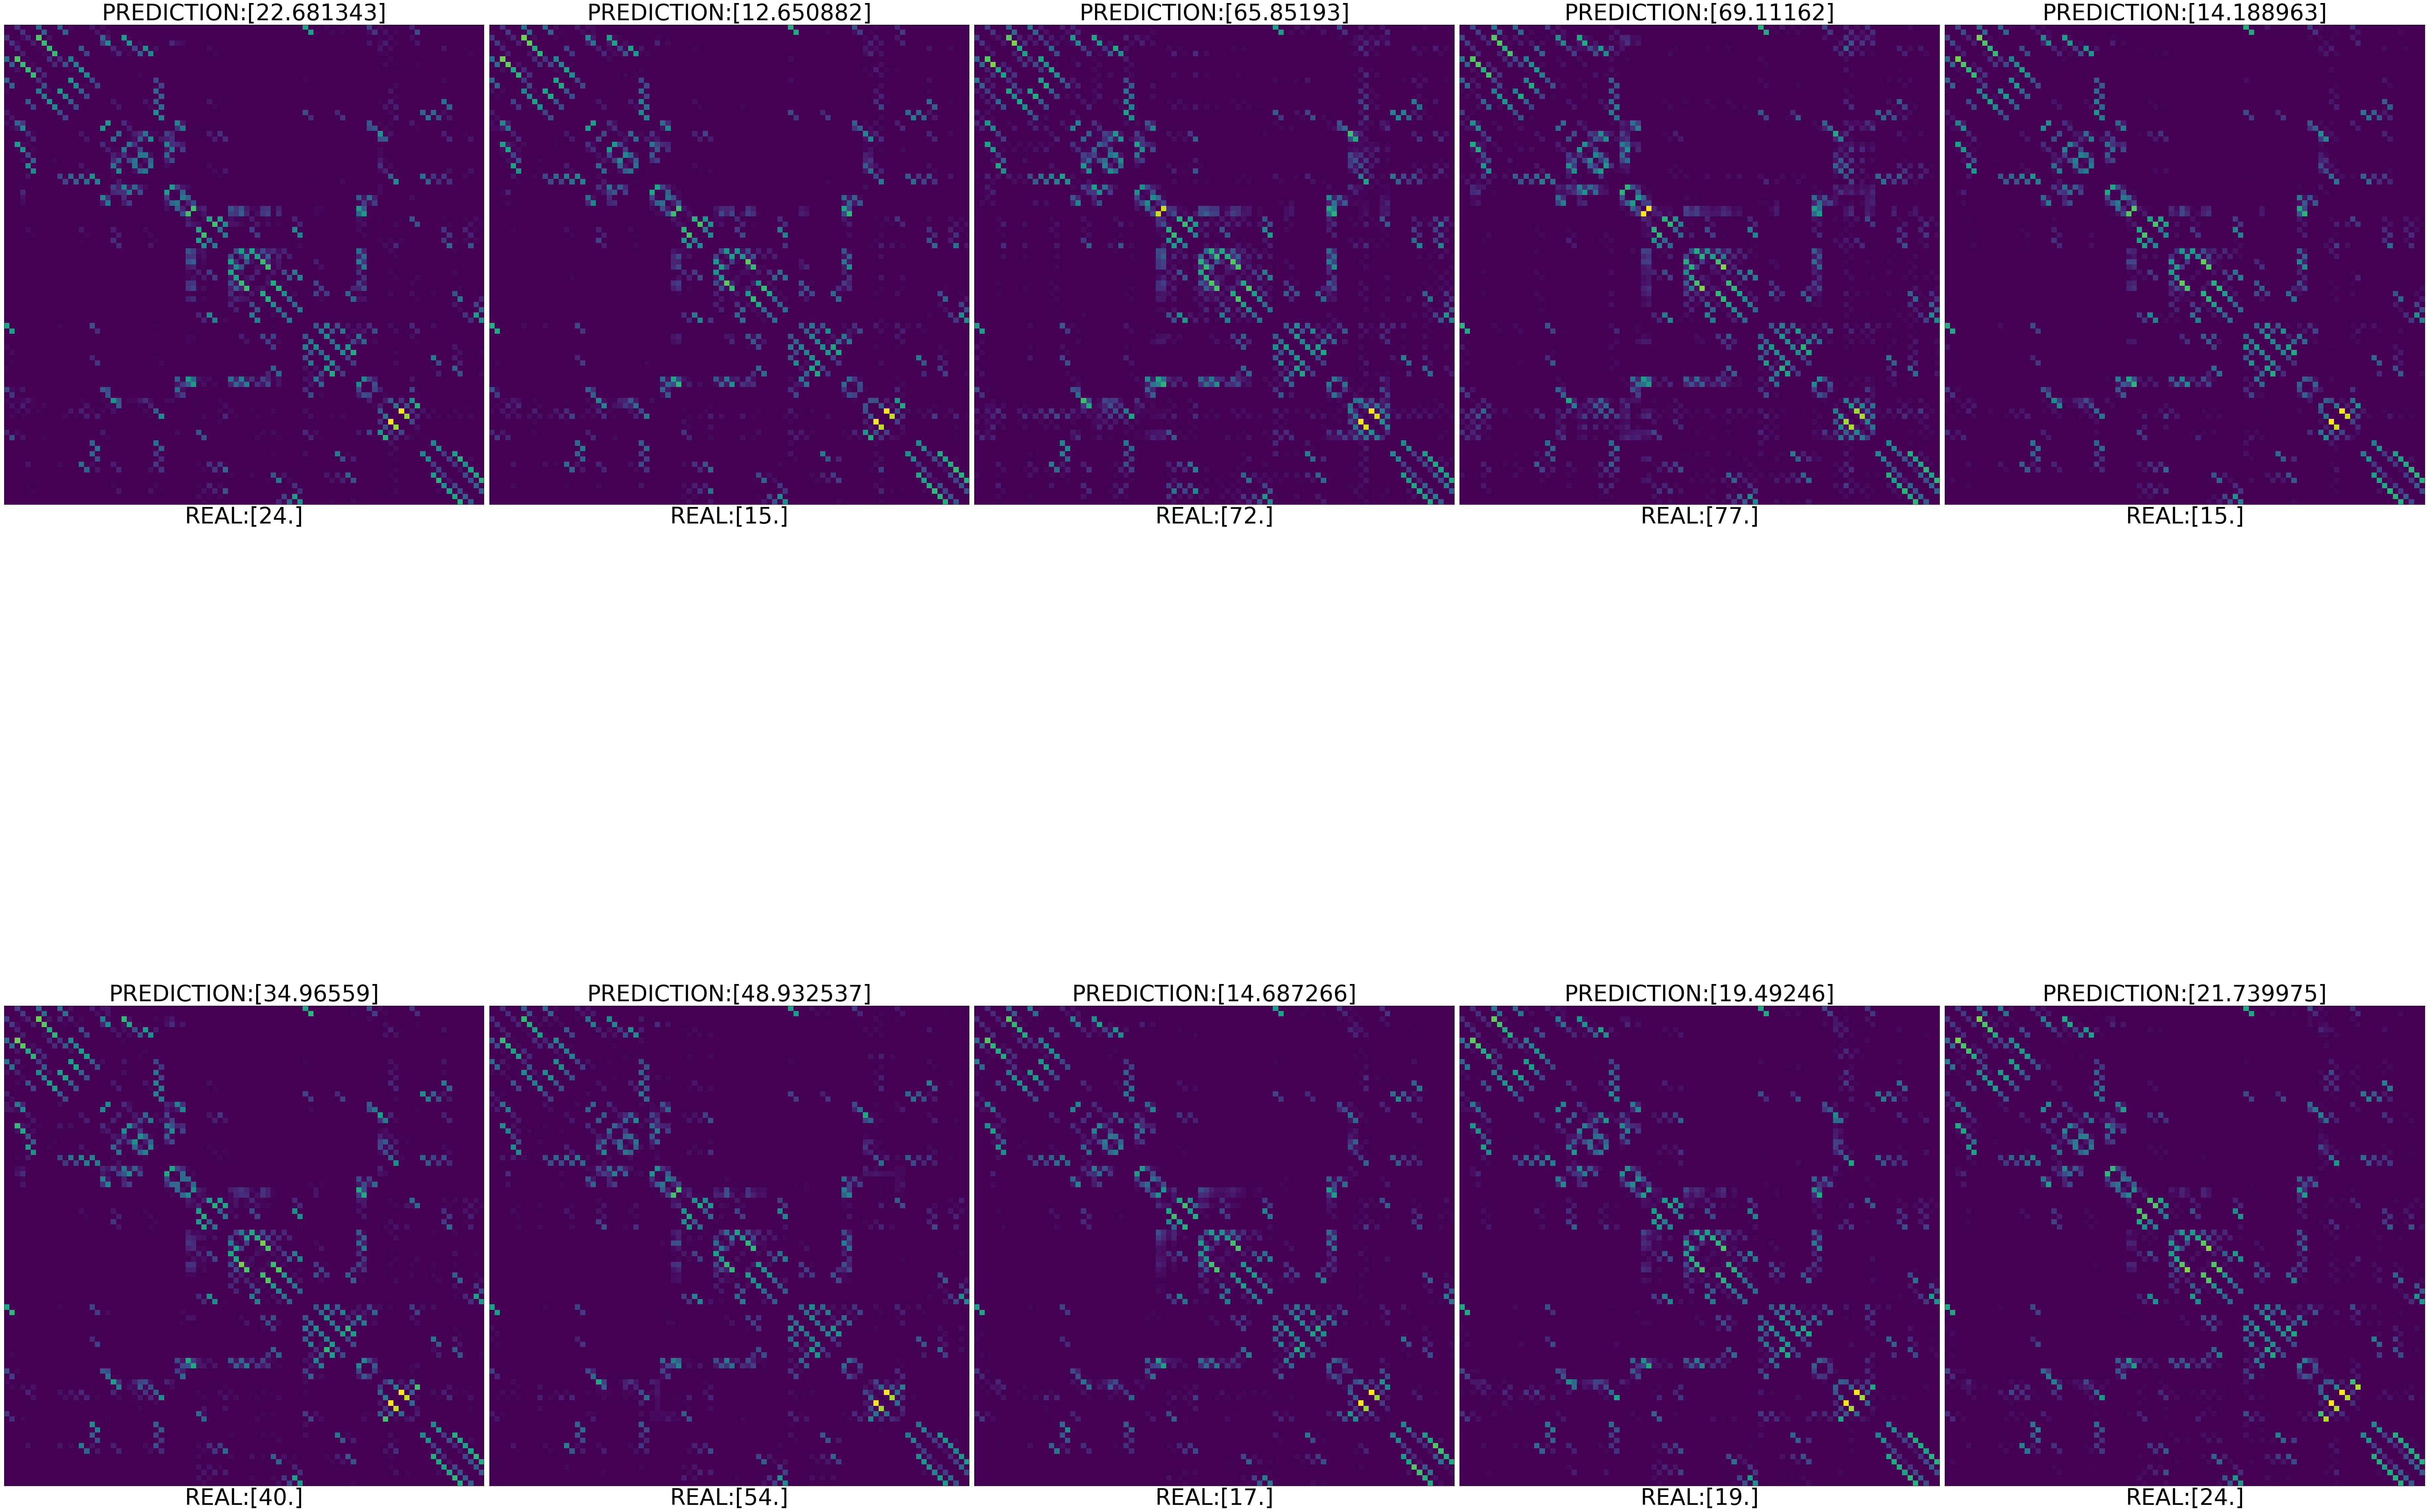

In [40]:
fig, axes = plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(90, 90),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(x_sample[i])
    ax.set_title(f"PREDICTION:{predSample[i]}", fontsize=60)
    ax.set_xlabel(f"REAL:{y_sample[i]}", fontsize=60)
plt.tight_layout()
plt.show()

### Result analysis

In [41]:
pred3=all_model.predict([train_data,X])
residuals = Y-pred3   #residuals
temp = np.argpartition(-residuals.flatten(), 4)
result_args = temp[:4]
print(result_args)
temp = np.partition(-residuals.flatten(), 4)
result = -temp[:4]
print(result)

[44 52 58 73]
[10.42105103 10.80702209 10.06567383  8.82945251]


In [42]:
pred4=age_model.predict(train_data)
residuals2 = Y-pred4   #residuals
temp = np.argpartition(-residuals2.flatten(), 4)
result_args = temp[:4]
print(result_args)
temp = np.partition(-residuals2.flatten(), 4)
result = -temp[:4]
print(result)

[44 52 10 58]
[15.27580261 14.61643219 12.84165192 12.76173019]


In [43]:
sort = Y[:, 0].argsort()
Ysorted = Y[sort]
train_dataSorted = train_data[sort]
Xsorted = X[sort]
Ysorted

array([[13.],
       [14.],
       [15.],
       [15.],
       [15.],
       [15.],
       [15.],
       [15.],
       [15.],
       [16.],
       [16.],
       [16.],
       [16.],
       [16.],
       [16.],
       [16.],
       [16.],
       [17.],
       [17.],
       [18.],
       [18.],
       [18.],
       [18.],
       [18.],
       [19.],
       [19.],
       [19.],
       [20.],
       [20.],
       [21.],
       [22.],
       [22.],
       [24.],
       [24.],
       [24.],
       [24.],
       [24.],
       [25.],
       [25.],
       [25.],
       [25.],
       [26.],
       [27.],
       [27.],
       [27.],
       [28.],
       [31.],
       [33.],
       [37.],
       [40.],
       [40.],
       [41.],
       [42.],
       [46.],
       [51.],
       [51.],
       [52.],
       [53.],
       [53.],
       [54.],
       [55.],
       [55.],
       [55.],
       [56.],
       [56.],
       [57.],
       [57.],
       [58.],
       [58.],
       [58.],
       [58.],
      

#### Age model

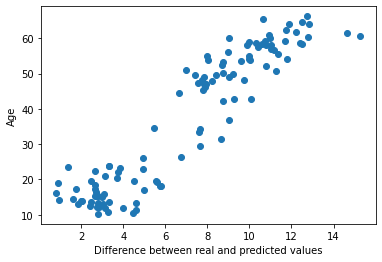

In [44]:
plt.scatter(Y-pred4,pred4)
plt.xlabel("Difference between real and predicted values", fontsize = 10)
plt.ylabel("Age", fontsize = 10)
plt.show()

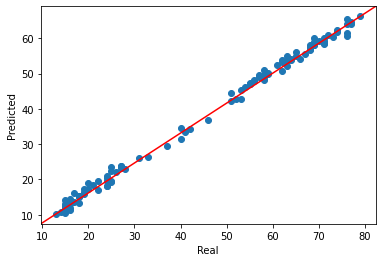

In [45]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.scatter(Y, pred4)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel("Real", fontsize = 10)
plt.ylabel("Predicted", fontsize = 10)
plt.show()

In [46]:
mae = age_model.evaluate(train_data, Y, verbose=0)
print("MAE: ", mae[1])

MAE:  7.0387163162231445


In [47]:
maeAge1 = age_model.evaluate(train_dataSorted[:26], Ysorted[:26], verbose=0)[1]
maeAge1

2.7673251628875732

In [48]:
maeAge2 = age_model.evaluate(train_dataSorted[27:45], Ysorted[27:45], verbose=0)[1]
maeAge2

3.6740307807922363

In [49]:
maeAge3 = age_model.evaluate(train_dataSorted[46:48], Ysorted[46:48], verbose=0)[1]
maeAge3

5.8304901123046875

In [50]:
maeAge4 = age_model.evaluate(train_dataSorted[49:53], Ysorted[49:53], verbose=0)[1]
maeAge4

7.331148147583008

In [51]:
maeAge5 = age_model.evaluate(train_dataSorted[54:72], Ysorted[54:72], verbose=0)[1]
maeAge5

8.240068435668945

In [52]:
maeAge6 = age_model.evaluate(train_dataSorted[73:96], Ysorted[73:96], verbose=0)[1]
maeAge6

10.059063911437988

In [53]:
maeAge7 = age_model.evaluate(train_dataSorted[97:112], Ysorted[97:112], verbose=0)[1]
maeAge7

12.382745742797852

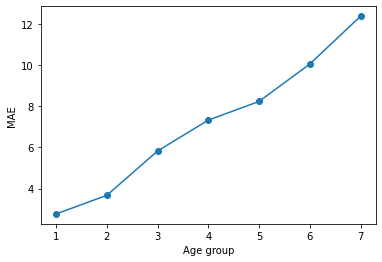

In [54]:
values = np.array([[maeAge1], [maeAge2], [maeAge3], [maeAge4], [maeAge5], [maeAge6], [maeAge7]])

bins = np.arange(1, 10) * 10
categories = np.unique(np.digitize(Ysorted, bins, right=True))

plt.xlabel("Age group", fontsize = 10)
plt.ylabel("MAE", fontsize = 10)
plt.plot(categories, values, '-o');

#### All model

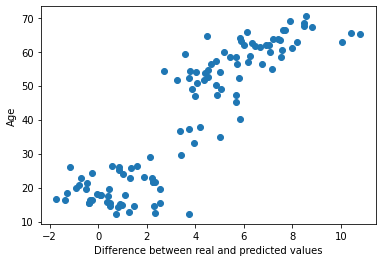

In [55]:
plt.scatter(Y-pred3,pred3)
plt.xlabel("Difference between real and predicted values", fontsize = 10)
plt.ylabel("Age", fontsize = 10)
plt.show()

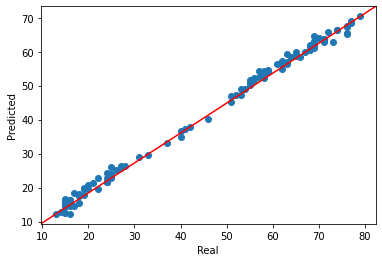

In [56]:
fig, ax = plt.subplots()
ax.scatter(Y, pred3)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel("Real", fontsize = 10)
plt.ylabel("Predicted", fontsize = 10)
plt.show()

In [57]:
mae2 = all_model.evaluate([train_data,X], Y, verbose=0)
print("MAE: ", mae2[1])

MAE:  3.935943126678467


In [58]:
maeAge1 = all_model.evaluate([train_dataSorted[:26],Xsorted[:26]], Ysorted[:26], verbose=0)[1]
maeAge1

1.0306203365325928

In [59]:
maeAge2 = all_model.evaluate([train_dataSorted[27:45],Xsorted[27:45]], Ysorted[27:45], verbose=0)[1]
maeAge2

1.2960114479064941

In [60]:
maeAge3 = all_model.evaluate([train_dataSorted[46:48],Xsorted[46:48]], Ysorted[46:48], verbose=0)[1]
maeAge3

2.770350456237793

In [61]:
maeAge4 = all_model.evaluate([train_dataSorted[49:53],Xsorted[49:53]], Ysorted[49:53], verbose=0)[1]
maeAge4

4.076062202453613

In [62]:
maeAge5 = all_model.evaluate([train_dataSorted[54:72],Xsorted[54:72]], Ysorted[54:72], verbose=0)[1]
maeAge5

4.434554100036621

In [63]:
maeAge6 = all_model.evaluate([train_dataSorted[73:96],Xsorted[73:96]], Ysorted[73:96], verbose=0)[1]
maeAge6

6.1508870124816895

In [64]:
maeAge7 = all_model.evaluate([train_dataSorted[97:112],Xsorted[97:112]], Ysorted[97:112], verbose=0)[1]
maeAge7

8.352533340454102

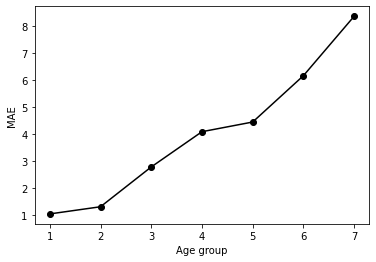

In [65]:
values2 = np.array([[maeAge1], [maeAge2], [maeAge3], [maeAge4], [maeAge5], [maeAge6], [maeAge7]])

bins = np.arange(1, 10) * 10
categories2 = np.unique(np.digitize(Ysorted, bins, right=True))

plt.xlabel("Age group", fontsize = 10)
plt.ylabel("MAE", fontsize = 10)
plt.plot(categories2, values2, '-ok');

#### Model comparison

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


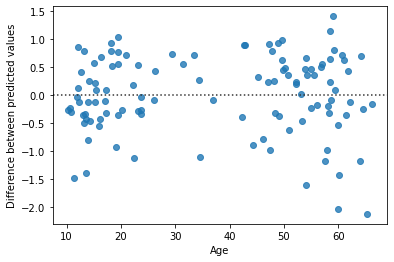

In [66]:
p = sns.residplot(pred4, pred3) 
p.set_xlabel("Age", fontsize = 10)
p.set_ylabel("Difference between predicted values", fontsize = 10)
plt.show()

In [67]:
import sklearn.metrics as metrics
print('MAE between models:', metrics.mean_absolute_error(pred4, pred3))
print('MAE model all - model age:', (mae2[1]-mae[1]))

MAE between models: 3.2914414
MAE model all - model age: -3.1027731895446777


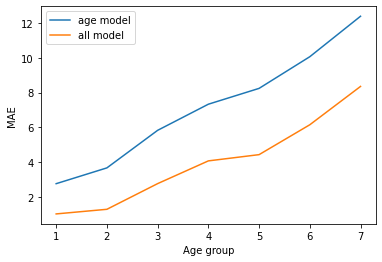

In [68]:
plt.plot(categories,values, label = "age model")
plt.plot(categories2,values2, label = "all model")
plt.xlabel("Age group", fontsize = 10)
plt.ylabel("MAE", fontsize = 10)
plt.legend()
plt.show()